In [1]:
### Prepare module structure ###

import sys
sys.path.append("../")

In [2]:
### IMPORT ###

import numpy as np
import math
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

import time

import matplotlib.pyplot as plt
%matplotlib inline

from util import *
import data
import models

# auto reload imports on local changes
%load_ext autoreload
%autoreload 2
print(torch.__version__)

1.0.0


In [3]:
### Check device ###

USE_GPU = True

dtype = torch.float32

if USE_GPU and torch.cuda.is_available():
    # TODO: Change to CPU used!
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:0


fashion


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


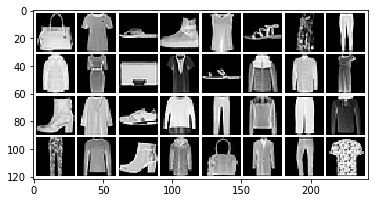

torch.Size([32, 1, 28, 28])


In [4]:
### LOAD DATA ###

dataset = 'fashion'
dataloader, imsize = data.load(dataset, path='/home/shared/phase-retrieval/data/' + dataset, batch_size=32)

sample = next(iter(dataloader['train']))
sample_ft =  torch.rfft(sample, 2, onesided=False)
sample_magnitudes = torch.sqrt(torch.sum(sample_ft ** 2, -1))

plot_grid(sample)
print(sample_magnitudes.shape)

In [5]:
def calc_mags(x):
    ft =  torch.rfft(x, 2, onesided=False)
    mags = torch.sqrt(torch.sum(ft ** 2, -1) + 1e-16)
    return mags

In [6]:
# Define loss

def gen_loss(gen_output, x):
    #return  torch.mean((gen_output - x) ** 2)
    return  torch.mean(torch.abs(gen_output - x))

In [7]:
### Create new models ###

gen = models.FCNet(imsize=imsize, h=2048)

Version 0.4


In [8]:
# Set training parameters

history = []
opt = optim.Adam(gen.parameters(), lr=1e-3)

In [9]:
# Initial loss

gen = gen.to(device)
sample = sample.to(device)
sample_magnitudes = sample_magnitudes.to(device)

gen_out = gen(sample_magnitudes)

loss = gen_loss(gen_out, sample)

print("Generator loss:", loss.item())

Generator loss: 0.3763163685798645


In [10]:
def train_model(model, optimizer, device, loader_train, epochs=1):

    # move the model parameters to CPU/GPU
    model = model.to(device=device)
    
    history = []
    
    for e in range(epochs):

        for t, x in enumerate(loader_train):
            # put model to training mode
            model.train()
            
            # move x to device and reduce to magnitude information in fourier space
            x = x.to(device=device)
            magnitudes = calc_mags(x)

            # compute loss as pixel wise distance to original input
            x_pred = gen(magnitudes)
            
            loss = gen_loss(x_pred, x)
            #loss = torch.mean((x - out_real)**2) + torch.mean((phases - out_phases)**2)
            history.append(loss.item())

            # perform backprop and learning step
            optimizer.zero_grad()
            loss.backward() 
            optimizer.step()

            if t % 100 == 0:
                print("epoch: {:2} \t step:{} \t loss: {:3.4}".format(e+1, t, history[-1]))
                
        plt.plot(history)
        plt.show()
                
    return history

epoch:  1 	 step:0 	 loss: 0.3836
epoch:  1 	 step:100 	 loss: 0.1092
epoch:  1 	 step:200 	 loss: 0.09815
epoch:  1 	 step:300 	 loss: 0.08871
epoch:  1 	 step:400 	 loss: 0.09526
epoch:  1 	 step:500 	 loss: 0.1034
epoch:  1 	 step:600 	 loss: 0.09091
epoch:  1 	 step:700 	 loss: 0.09228
epoch:  1 	 step:800 	 loss: 0.09184
epoch:  1 	 step:900 	 loss: 0.08934
epoch:  1 	 step:1000 	 loss: 0.09153
epoch:  1 	 step:1100 	 loss: 0.09433
epoch:  1 	 step:1200 	 loss: 0.08082
epoch:  1 	 step:1300 	 loss: 0.09124
epoch:  1 	 step:1400 	 loss: 0.07666
epoch:  1 	 step:1500 	 loss: 0.07935
epoch:  1 	 step:1600 	 loss: 0.07674
epoch:  1 	 step:1700 	 loss: 0.0826
epoch:  1 	 step:1800 	 loss: 0.08557


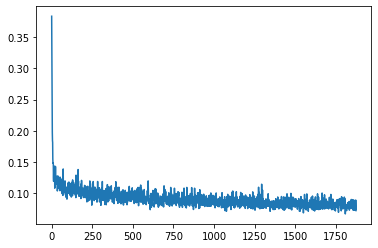

epoch:  2 	 step:0 	 loss: 0.08898
epoch:  2 	 step:100 	 loss: 0.08218
epoch:  2 	 step:200 	 loss: 0.07824
epoch:  2 	 step:300 	 loss: 0.07377
epoch:  2 	 step:400 	 loss: 0.07724
epoch:  2 	 step:500 	 loss: 0.08898
epoch:  2 	 step:600 	 loss: 0.07381
epoch:  2 	 step:700 	 loss: 0.08373
epoch:  2 	 step:800 	 loss: 0.08481
epoch:  2 	 step:900 	 loss: 0.07821
epoch:  2 	 step:1000 	 loss: 0.08373
epoch:  2 	 step:1100 	 loss: 0.0726
epoch:  2 	 step:1200 	 loss: 0.07869
epoch:  2 	 step:1300 	 loss: 0.06411
epoch:  2 	 step:1400 	 loss: 0.08024
epoch:  2 	 step:1500 	 loss: 0.07298
epoch:  2 	 step:1600 	 loss: 0.07245
epoch:  2 	 step:1700 	 loss: 0.06588
epoch:  2 	 step:1800 	 loss: 0.08046


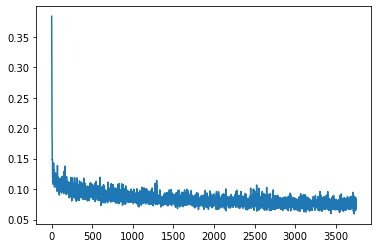

epoch:  3 	 step:0 	 loss: 0.08094
epoch:  3 	 step:100 	 loss: 0.06976
epoch:  3 	 step:200 	 loss: 0.06882
epoch:  3 	 step:300 	 loss: 0.07701
epoch:  3 	 step:400 	 loss: 0.07188
epoch:  3 	 step:500 	 loss: 0.07663
epoch:  3 	 step:600 	 loss: 0.07376
epoch:  3 	 step:700 	 loss: 0.07814
epoch:  3 	 step:800 	 loss: 0.07576
epoch:  3 	 step:900 	 loss: 0.07801
epoch:  3 	 step:1000 	 loss: 0.07899
epoch:  3 	 step:1100 	 loss: 0.07087
epoch:  3 	 step:1200 	 loss: 0.09283
epoch:  3 	 step:1300 	 loss: 0.06757
epoch:  3 	 step:1400 	 loss: 0.07318
epoch:  3 	 step:1500 	 loss: 0.07132
epoch:  3 	 step:1600 	 loss: 0.07119
epoch:  3 	 step:1700 	 loss: 0.06592
epoch:  3 	 step:1800 	 loss: 0.06769


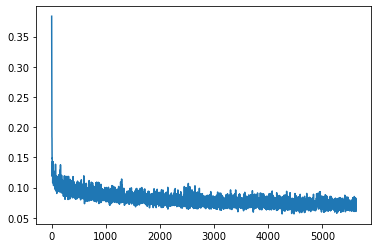

epoch:  4 	 step:0 	 loss: 0.07728
epoch:  4 	 step:100 	 loss: 0.06018
epoch:  4 	 step:200 	 loss: 0.07749
epoch:  4 	 step:300 	 loss: 0.0708
epoch:  4 	 step:400 	 loss: 0.0744
epoch:  4 	 step:500 	 loss: 0.06733
epoch:  4 	 step:600 	 loss: 0.07808
epoch:  4 	 step:700 	 loss: 0.07857
epoch:  4 	 step:800 	 loss: 0.07281
epoch:  4 	 step:900 	 loss: 0.06839
epoch:  4 	 step:1000 	 loss: 0.07031
epoch:  4 	 step:1100 	 loss: 0.06784
epoch:  4 	 step:1200 	 loss: 0.06339
epoch:  4 	 step:1300 	 loss: 0.06898
epoch:  4 	 step:1400 	 loss: 0.07208
epoch:  4 	 step:1500 	 loss: 0.06988
epoch:  4 	 step:1600 	 loss: 0.07312
epoch:  4 	 step:1700 	 loss: 0.07853
epoch:  4 	 step:1800 	 loss: 0.06985


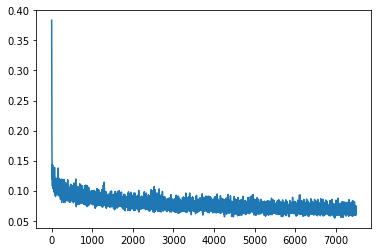

epoch:  5 	 step:0 	 loss: 0.06193
epoch:  5 	 step:100 	 loss: 0.06806
epoch:  5 	 step:200 	 loss: 0.06095
epoch:  5 	 step:300 	 loss: 0.0681
epoch:  5 	 step:400 	 loss: 0.08065
epoch:  5 	 step:500 	 loss: 0.06383
epoch:  5 	 step:600 	 loss: 0.06771
epoch:  5 	 step:700 	 loss: 0.07261
epoch:  5 	 step:800 	 loss: 0.0764
epoch:  5 	 step:900 	 loss: 0.06432
epoch:  5 	 step:1000 	 loss: 0.06633
epoch:  5 	 step:1100 	 loss: 0.0605
epoch:  5 	 step:1200 	 loss: 0.06618
epoch:  5 	 step:1300 	 loss: 0.07221
epoch:  5 	 step:1400 	 loss: 0.0751
epoch:  5 	 step:1500 	 loss: 0.06928
epoch:  5 	 step:1600 	 loss: 0.07082
epoch:  5 	 step:1700 	 loss: 0.06337
epoch:  5 	 step:1800 	 loss: 0.07277


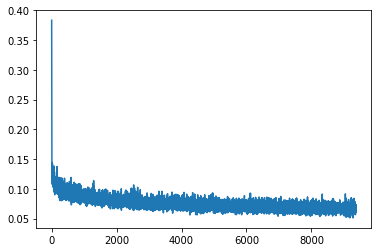

epoch:  6 	 step:0 	 loss: 0.06024
epoch:  6 	 step:100 	 loss: 0.05697
epoch:  6 	 step:200 	 loss: 0.0679
epoch:  6 	 step:300 	 loss: 0.06378
epoch:  6 	 step:400 	 loss: 0.05842
epoch:  6 	 step:500 	 loss: 0.05965
epoch:  6 	 step:600 	 loss: 0.06458
epoch:  6 	 step:700 	 loss: 0.06954
epoch:  6 	 step:800 	 loss: 0.07013
epoch:  6 	 step:900 	 loss: 0.05772
epoch:  6 	 step:1000 	 loss: 0.06449
epoch:  6 	 step:1100 	 loss: 0.07183
epoch:  6 	 step:1200 	 loss: 0.07311
epoch:  6 	 step:1300 	 loss: 0.07045
epoch:  6 	 step:1400 	 loss: 0.06019
epoch:  6 	 step:1500 	 loss: 0.06338
epoch:  6 	 step:1600 	 loss: 0.07076
epoch:  6 	 step:1700 	 loss: 0.05863
epoch:  6 	 step:1800 	 loss: 0.05575


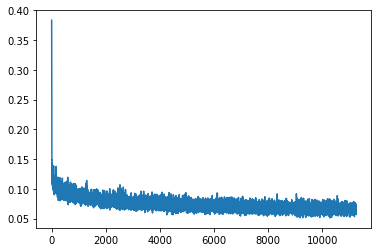

epoch:  7 	 step:0 	 loss: 0.05884
epoch:  7 	 step:100 	 loss: 0.0581
epoch:  7 	 step:200 	 loss: 0.07778
epoch:  7 	 step:300 	 loss: 0.06049
epoch:  7 	 step:400 	 loss: 0.06436
epoch:  7 	 step:500 	 loss: 0.07191
epoch:  7 	 step:600 	 loss: 0.0605
epoch:  7 	 step:700 	 loss: 0.06723
epoch:  7 	 step:800 	 loss: 0.07282
epoch:  7 	 step:900 	 loss: 0.06682
epoch:  7 	 step:1000 	 loss: 0.06555
epoch:  7 	 step:1100 	 loss: 0.06093
epoch:  7 	 step:1200 	 loss: 0.06216
epoch:  7 	 step:1300 	 loss: 0.07164
epoch:  7 	 step:1400 	 loss: 0.0636
epoch:  7 	 step:1500 	 loss: 0.06927
epoch:  7 	 step:1600 	 loss: 0.0611
epoch:  7 	 step:1700 	 loss: 0.06568
epoch:  7 	 step:1800 	 loss: 0.0614


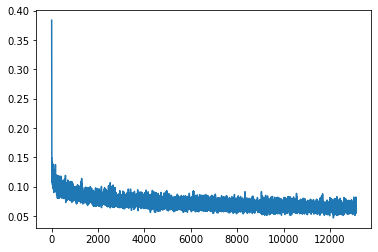

epoch:  8 	 step:0 	 loss: 0.05824
epoch:  8 	 step:100 	 loss: 0.06833
epoch:  8 	 step:200 	 loss: 0.05871
epoch:  8 	 step:300 	 loss: 0.06088
epoch:  8 	 step:400 	 loss: 0.06364
epoch:  8 	 step:500 	 loss: 0.07466
epoch:  8 	 step:600 	 loss: 0.06304
epoch:  8 	 step:700 	 loss: 0.05601
epoch:  8 	 step:800 	 loss: 0.05264
epoch:  8 	 step:900 	 loss: 0.0607
epoch:  8 	 step:1000 	 loss: 0.06588
epoch:  8 	 step:1100 	 loss: 0.06342
epoch:  8 	 step:1200 	 loss: 0.064
epoch:  8 	 step:1300 	 loss: 0.05727
epoch:  8 	 step:1400 	 loss: 0.06818
epoch:  8 	 step:1500 	 loss: 0.06181
epoch:  8 	 step:1600 	 loss: 0.05353
epoch:  8 	 step:1700 	 loss: 0.06118
epoch:  8 	 step:1800 	 loss: 0.06362


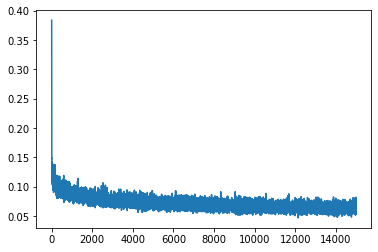

epoch:  9 	 step:0 	 loss: 0.05639
epoch:  9 	 step:100 	 loss: 0.06103
epoch:  9 	 step:200 	 loss: 0.07274
epoch:  9 	 step:300 	 loss: 0.0634
epoch:  9 	 step:400 	 loss: 0.06429
epoch:  9 	 step:500 	 loss: 0.06745
epoch:  9 	 step:600 	 loss: 0.07318
epoch:  9 	 step:700 	 loss: 0.06222
epoch:  9 	 step:800 	 loss: 0.06012
epoch:  9 	 step:900 	 loss: 0.05666
epoch:  9 	 step:1000 	 loss: 0.06566
epoch:  9 	 step:1100 	 loss: 0.06581
epoch:  9 	 step:1200 	 loss: 0.05586
epoch:  9 	 step:1300 	 loss: 0.05325
epoch:  9 	 step:1400 	 loss: 0.06992
epoch:  9 	 step:1500 	 loss: 0.06274
epoch:  9 	 step:1600 	 loss: 0.07195
epoch:  9 	 step:1700 	 loss: 0.06423
epoch:  9 	 step:1800 	 loss: 0.05725


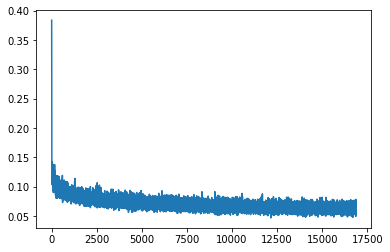

epoch: 10 	 step:0 	 loss: 0.06369
epoch: 10 	 step:100 	 loss: 0.05826
epoch: 10 	 step:200 	 loss: 0.06269
epoch: 10 	 step:300 	 loss: 0.05819
epoch: 10 	 step:400 	 loss: 0.06399
epoch: 10 	 step:500 	 loss: 0.06272
epoch: 10 	 step:600 	 loss: 0.06783
epoch: 10 	 step:700 	 loss: 0.06164
epoch: 10 	 step:800 	 loss: 0.05421
epoch: 10 	 step:900 	 loss: 0.06319
epoch: 10 	 step:1000 	 loss: 0.06294
epoch: 10 	 step:1100 	 loss: 0.06828
epoch: 10 	 step:1200 	 loss: 0.06493
epoch: 10 	 step:1300 	 loss: 0.06019
epoch: 10 	 step:1400 	 loss: 0.06355
epoch: 10 	 step:1500 	 loss: 0.06576
epoch: 10 	 step:1600 	 loss: 0.06006
epoch: 10 	 step:1700 	 loss: 0.06087
epoch: 10 	 step:1800 	 loss: 0.05967


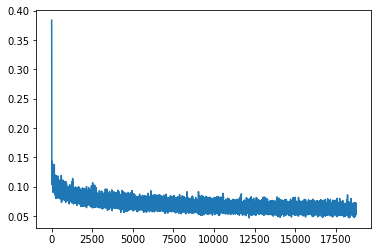

epoch: 11 	 step:0 	 loss: 0.05728
epoch: 11 	 step:100 	 loss: 0.05769
epoch: 11 	 step:200 	 loss: 0.06432
epoch: 11 	 step:300 	 loss: 0.07542
epoch: 11 	 step:400 	 loss: 0.05779
epoch: 11 	 step:500 	 loss: 0.06998
epoch: 11 	 step:600 	 loss: 0.05898
epoch: 11 	 step:700 	 loss: 0.05803
epoch: 11 	 step:800 	 loss: 0.05826
epoch: 11 	 step:900 	 loss: 0.06437
epoch: 11 	 step:1000 	 loss: 0.06086
epoch: 11 	 step:1100 	 loss: 0.05601
epoch: 11 	 step:1200 	 loss: 0.05463
epoch: 11 	 step:1300 	 loss: 0.06206
epoch: 11 	 step:1400 	 loss: 0.07273
epoch: 11 	 step:1500 	 loss: 0.06855
epoch: 11 	 step:1600 	 loss: 0.05527
epoch: 11 	 step:1700 	 loss: 0.05582
epoch: 11 	 step:1800 	 loss: 0.05494


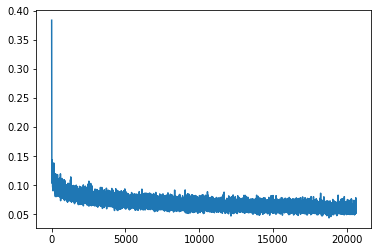

epoch: 12 	 step:0 	 loss: 0.05933
epoch: 12 	 step:100 	 loss: 0.06598
epoch: 12 	 step:200 	 loss: 0.0546
epoch: 12 	 step:300 	 loss: 0.07255
epoch: 12 	 step:400 	 loss: 0.05952
epoch: 12 	 step:500 	 loss: 0.05776
epoch: 12 	 step:600 	 loss: 0.06759
epoch: 12 	 step:700 	 loss: 0.06378
epoch: 12 	 step:800 	 loss: 0.05596
epoch: 12 	 step:900 	 loss: 0.0582
epoch: 12 	 step:1000 	 loss: 0.06927
epoch: 12 	 step:1100 	 loss: 0.04961
epoch: 12 	 step:1200 	 loss: 0.07115
epoch: 12 	 step:1300 	 loss: 0.06135
epoch: 12 	 step:1400 	 loss: 0.06702
epoch: 12 	 step:1500 	 loss: 0.0641
epoch: 12 	 step:1600 	 loss: 0.06571
epoch: 12 	 step:1700 	 loss: 0.04911
epoch: 12 	 step:1800 	 loss: 0.06228


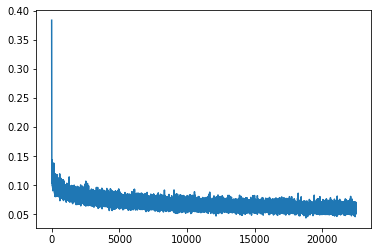

epoch: 13 	 step:0 	 loss: 0.06139
epoch: 13 	 step:100 	 loss: 0.06222
epoch: 13 	 step:200 	 loss: 0.06055
epoch: 13 	 step:300 	 loss: 0.06112
epoch: 13 	 step:400 	 loss: 0.05758
epoch: 13 	 step:500 	 loss: 0.06156
epoch: 13 	 step:600 	 loss: 0.05849
epoch: 13 	 step:700 	 loss: 0.05602
epoch: 13 	 step:800 	 loss: 0.05616
epoch: 13 	 step:900 	 loss: 0.05126
epoch: 13 	 step:1000 	 loss: 0.05436
epoch: 13 	 step:1100 	 loss: 0.05885
epoch: 13 	 step:1200 	 loss: 0.05873
epoch: 13 	 step:1300 	 loss: 0.06043
epoch: 13 	 step:1400 	 loss: 0.06214
epoch: 13 	 step:1500 	 loss: 0.05967
epoch: 13 	 step:1600 	 loss: 0.05372
epoch: 13 	 step:1700 	 loss: 0.05752
epoch: 13 	 step:1800 	 loss: 0.06554


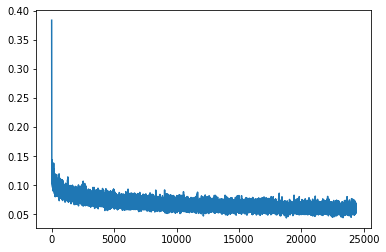

epoch: 14 	 step:0 	 loss: 0.06521
epoch: 14 	 step:100 	 loss: 0.0596
epoch: 14 	 step:200 	 loss: 0.05282
epoch: 14 	 step:300 	 loss: 0.05545
epoch: 14 	 step:400 	 loss: 0.05919
epoch: 14 	 step:500 	 loss: 0.05345
epoch: 14 	 step:600 	 loss: 0.0552
epoch: 14 	 step:700 	 loss: 0.05386
epoch: 14 	 step:800 	 loss: 0.05886
epoch: 14 	 step:900 	 loss: 0.06029
epoch: 14 	 step:1000 	 loss: 0.06046
epoch: 14 	 step:1100 	 loss: 0.05819
epoch: 14 	 step:1200 	 loss: 0.05976
epoch: 14 	 step:1300 	 loss: 0.05698
epoch: 14 	 step:1400 	 loss: 0.05981
epoch: 14 	 step:1500 	 loss: 0.05455
epoch: 14 	 step:1600 	 loss: 0.05704
epoch: 14 	 step:1700 	 loss: 0.06458
epoch: 14 	 step:1800 	 loss: 0.07882


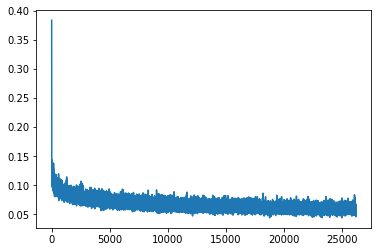

epoch: 15 	 step:0 	 loss: 0.06055
epoch: 15 	 step:100 	 loss: 0.05822
epoch: 15 	 step:200 	 loss: 0.05563
epoch: 15 	 step:300 	 loss: 0.05856
epoch: 15 	 step:400 	 loss: 0.06403
epoch: 15 	 step:500 	 loss: 0.05547
epoch: 15 	 step:600 	 loss: 0.05715
epoch: 15 	 step:700 	 loss: 0.05985
epoch: 15 	 step:800 	 loss: 0.05655
epoch: 15 	 step:900 	 loss: 0.05761
epoch: 15 	 step:1000 	 loss: 0.04994
epoch: 15 	 step:1100 	 loss: 0.05844
epoch: 15 	 step:1200 	 loss: 0.06051
epoch: 15 	 step:1300 	 loss: 0.06037
epoch: 15 	 step:1400 	 loss: 0.05663
epoch: 15 	 step:1500 	 loss: 0.0482
epoch: 15 	 step:1600 	 loss: 0.05377
epoch: 15 	 step:1700 	 loss: 0.05553
epoch: 15 	 step:1800 	 loss: 0.06237


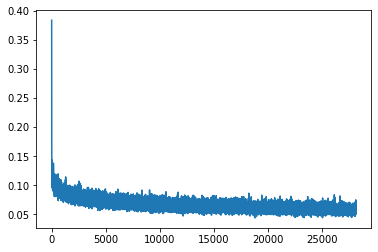

epoch: 16 	 step:0 	 loss: 0.064
epoch: 16 	 step:100 	 loss: 0.05674
epoch: 16 	 step:200 	 loss: 0.05431
epoch: 16 	 step:300 	 loss: 0.06287
epoch: 16 	 step:400 	 loss: 0.05377
epoch: 16 	 step:500 	 loss: 0.05638
epoch: 16 	 step:600 	 loss: 0.06298
epoch: 16 	 step:700 	 loss: 0.05187
epoch: 16 	 step:800 	 loss: 0.05446
epoch: 16 	 step:900 	 loss: 0.05487
epoch: 16 	 step:1000 	 loss: 0.05195
epoch: 16 	 step:1100 	 loss: 0.05157
epoch: 16 	 step:1200 	 loss: 0.05775
epoch: 16 	 step:1300 	 loss: 0.04868
epoch: 16 	 step:1400 	 loss: 0.06021
epoch: 16 	 step:1500 	 loss: 0.0556
epoch: 16 	 step:1600 	 loss: 0.06464
epoch: 16 	 step:1700 	 loss: 0.05595
epoch: 16 	 step:1800 	 loss: 0.05231


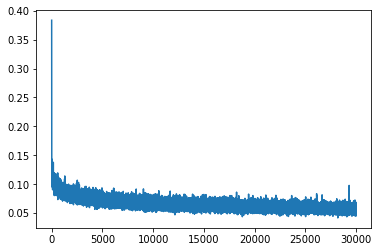

epoch: 17 	 step:0 	 loss: 0.05905
epoch: 17 	 step:100 	 loss: 0.06235
epoch: 17 	 step:200 	 loss: 0.05146
epoch: 17 	 step:300 	 loss: 0.05843
epoch: 17 	 step:400 	 loss: 0.06273
epoch: 17 	 step:500 	 loss: 0.05903
epoch: 17 	 step:600 	 loss: 0.06143
epoch: 17 	 step:700 	 loss: 0.06547
epoch: 17 	 step:800 	 loss: 0.05905
epoch: 17 	 step:900 	 loss: 0.05196
epoch: 17 	 step:1000 	 loss: 0.05487
epoch: 17 	 step:1100 	 loss: 0.05145
epoch: 17 	 step:1200 	 loss: 0.04837
epoch: 17 	 step:1300 	 loss: 0.04821
epoch: 17 	 step:1400 	 loss: 0.05374
epoch: 17 	 step:1500 	 loss: 0.0667
epoch: 17 	 step:1600 	 loss: 0.06218
epoch: 17 	 step:1700 	 loss: 0.05227
epoch: 17 	 step:1800 	 loss: 0.06328


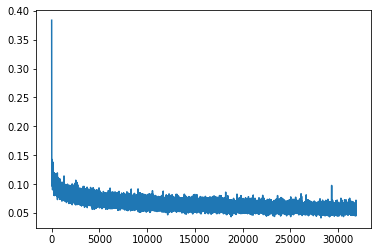

epoch: 18 	 step:0 	 loss: 0.05459
epoch: 18 	 step:100 	 loss: 0.05784
epoch: 18 	 step:200 	 loss: 0.05948
epoch: 18 	 step:300 	 loss: 0.06143
epoch: 18 	 step:400 	 loss: 0.04667
epoch: 18 	 step:500 	 loss: 0.05158
epoch: 18 	 step:600 	 loss: 0.06235
epoch: 18 	 step:700 	 loss: 0.06571
epoch: 18 	 step:800 	 loss: 0.06458
epoch: 18 	 step:900 	 loss: 0.06076
epoch: 18 	 step:1000 	 loss: 0.05456
epoch: 18 	 step:1100 	 loss: 0.05734
epoch: 18 	 step:1200 	 loss: 0.05845
epoch: 18 	 step:1300 	 loss: 0.05414
epoch: 18 	 step:1400 	 loss: 0.04831
epoch: 18 	 step:1500 	 loss: 0.06357
epoch: 18 	 step:1600 	 loss: 0.04873
epoch: 18 	 step:1700 	 loss: 0.0552
epoch: 18 	 step:1800 	 loss: 0.0633


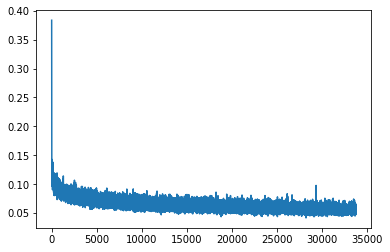

epoch: 19 	 step:0 	 loss: 0.05185
epoch: 19 	 step:100 	 loss: 0.06306
epoch: 19 	 step:200 	 loss: 0.06474
epoch: 19 	 step:300 	 loss: 0.05393
epoch: 19 	 step:400 	 loss: 0.04894
epoch: 19 	 step:500 	 loss: 0.0573
epoch: 19 	 step:600 	 loss: 0.05119
epoch: 19 	 step:700 	 loss: 0.06097
epoch: 19 	 step:800 	 loss: 0.05477
epoch: 19 	 step:900 	 loss: 0.05953
epoch: 19 	 step:1000 	 loss: 0.05561
epoch: 19 	 step:1100 	 loss: 0.04688
epoch: 19 	 step:1200 	 loss: 0.0566
epoch: 19 	 step:1300 	 loss: 0.0576
epoch: 19 	 step:1400 	 loss: 0.04937
epoch: 19 	 step:1500 	 loss: 0.05319
epoch: 19 	 step:1600 	 loss: 0.05936
epoch: 19 	 step:1700 	 loss: 0.05517
epoch: 19 	 step:1800 	 loss: 0.05447


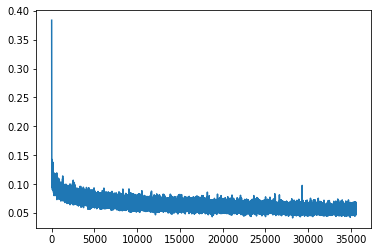

epoch: 20 	 step:0 	 loss: 0.0563
epoch: 20 	 step:100 	 loss: 0.05057
epoch: 20 	 step:200 	 loss: 0.05783
epoch: 20 	 step:300 	 loss: 0.06336
epoch: 20 	 step:400 	 loss: 0.0552
epoch: 20 	 step:500 	 loss: 0.04849
epoch: 20 	 step:600 	 loss: 0.06146
epoch: 20 	 step:700 	 loss: 0.04696
epoch: 20 	 step:800 	 loss: 0.0545
epoch: 20 	 step:900 	 loss: 0.05622
epoch: 20 	 step:1000 	 loss: 0.05097
epoch: 20 	 step:1100 	 loss: 0.05407
epoch: 20 	 step:1200 	 loss: 0.05079
epoch: 20 	 step:1300 	 loss: 0.06137
epoch: 20 	 step:1400 	 loss: 0.0546
epoch: 20 	 step:1500 	 loss: 0.04637
epoch: 20 	 step:1600 	 loss: 0.05629
epoch: 20 	 step:1700 	 loss: 0.05462
epoch: 20 	 step:1800 	 loss: 0.0487


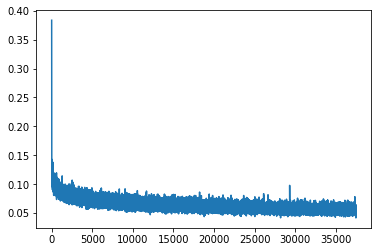

epoch: 21 	 step:0 	 loss: 0.04989
epoch: 21 	 step:100 	 loss: 0.05074
epoch: 21 	 step:200 	 loss: 0.05393
epoch: 21 	 step:300 	 loss: 0.05916
epoch: 21 	 step:400 	 loss: 0.04903
epoch: 21 	 step:500 	 loss: 0.06277
epoch: 21 	 step:600 	 loss: 0.04914
epoch: 21 	 step:700 	 loss: 0.0583
epoch: 21 	 step:800 	 loss: 0.05683
epoch: 21 	 step:900 	 loss: 0.05331
epoch: 21 	 step:1000 	 loss: 0.04934
epoch: 21 	 step:1100 	 loss: 0.05135
epoch: 21 	 step:1200 	 loss: 0.04873
epoch: 21 	 step:1300 	 loss: 0.06092
epoch: 21 	 step:1400 	 loss: 0.05001
epoch: 21 	 step:1500 	 loss: 0.06227
epoch: 21 	 step:1600 	 loss: 0.05865
epoch: 21 	 step:1700 	 loss: 0.05341
epoch: 21 	 step:1800 	 loss: 0.04598


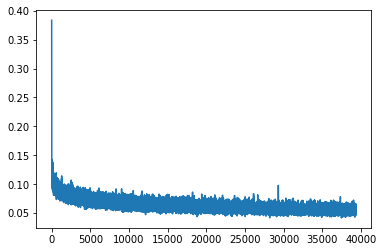

epoch: 22 	 step:0 	 loss: 0.05742
epoch: 22 	 step:100 	 loss: 0.04457
epoch: 22 	 step:200 	 loss: 0.06005
epoch: 22 	 step:300 	 loss: 0.05149
epoch: 22 	 step:400 	 loss: 0.07692
epoch: 22 	 step:500 	 loss: 0.05391
epoch: 22 	 step:600 	 loss: 0.06366
epoch: 22 	 step:700 	 loss: 0.05395
epoch: 22 	 step:800 	 loss: 0.05591
epoch: 22 	 step:900 	 loss: 0.05532
epoch: 22 	 step:1000 	 loss: 0.05083
epoch: 22 	 step:1100 	 loss: 0.04997
epoch: 22 	 step:1200 	 loss: 0.05011
epoch: 22 	 step:1300 	 loss: 0.05489
epoch: 22 	 step:1400 	 loss: 0.04813
epoch: 22 	 step:1500 	 loss: 0.05829
epoch: 22 	 step:1600 	 loss: 0.04844
epoch: 22 	 step:1700 	 loss: 0.05548
epoch: 22 	 step:1800 	 loss: 0.04832


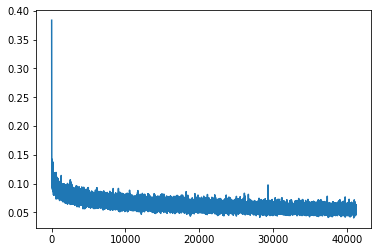

epoch: 23 	 step:0 	 loss: 0.05091
epoch: 23 	 step:100 	 loss: 0.06096
epoch: 23 	 step:200 	 loss: 0.05761
epoch: 23 	 step:300 	 loss: 0.04908
epoch: 23 	 step:400 	 loss: 0.0524
epoch: 23 	 step:500 	 loss: 0.06244
epoch: 23 	 step:600 	 loss: 0.05189
epoch: 23 	 step:700 	 loss: 0.05503
epoch: 23 	 step:800 	 loss: 0.06016
epoch: 23 	 step:900 	 loss: 0.05526
epoch: 23 	 step:1000 	 loss: 0.05549
epoch: 23 	 step:1100 	 loss: 0.05418
epoch: 23 	 step:1200 	 loss: 0.05728
epoch: 23 	 step:1300 	 loss: 0.05407
epoch: 23 	 step:1400 	 loss: 0.05392
epoch: 23 	 step:1500 	 loss: 0.04781
epoch: 23 	 step:1600 	 loss: 0.05447
epoch: 23 	 step:1700 	 loss: 0.06235
epoch: 23 	 step:1800 	 loss: 0.05099


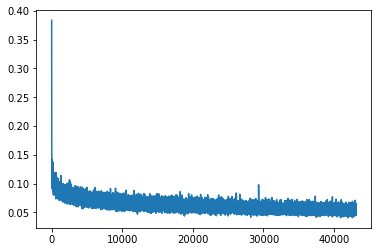

epoch: 24 	 step:0 	 loss: 0.05349
epoch: 24 	 step:100 	 loss: 0.04861
epoch: 24 	 step:200 	 loss: 0.05738
epoch: 24 	 step:300 	 loss: 0.05417
epoch: 24 	 step:400 	 loss: 0.05634
epoch: 24 	 step:500 	 loss: 0.05741
epoch: 24 	 step:600 	 loss: 0.05267
epoch: 24 	 step:700 	 loss: 0.05527
epoch: 24 	 step:800 	 loss: 0.04652
epoch: 24 	 step:900 	 loss: 0.05091
epoch: 24 	 step:1000 	 loss: 0.05069
epoch: 24 	 step:1100 	 loss: 0.05562
epoch: 24 	 step:1200 	 loss: 0.04889
epoch: 24 	 step:1300 	 loss: 0.04483
epoch: 24 	 step:1400 	 loss: 0.05515
epoch: 24 	 step:1500 	 loss: 0.05754
epoch: 24 	 step:1600 	 loss: 0.05308
epoch: 24 	 step:1700 	 loss: 0.05536
epoch: 24 	 step:1800 	 loss: 0.05385


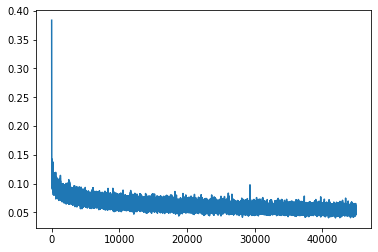

epoch: 25 	 step:0 	 loss: 0.0503
epoch: 25 	 step:100 	 loss: 0.05463
epoch: 25 	 step:200 	 loss: 0.05327
epoch: 25 	 step:300 	 loss: 0.05509
epoch: 25 	 step:400 	 loss: 0.05017
epoch: 25 	 step:500 	 loss: 0.0503
epoch: 25 	 step:600 	 loss: 0.05315
epoch: 25 	 step:700 	 loss: 0.04953
epoch: 25 	 step:800 	 loss: 0.05045
epoch: 25 	 step:900 	 loss: 0.05686
epoch: 25 	 step:1000 	 loss: 0.05924
epoch: 25 	 step:1100 	 loss: 0.05044
epoch: 25 	 step:1200 	 loss: 0.05471
epoch: 25 	 step:1300 	 loss: 0.0523
epoch: 25 	 step:1400 	 loss: 0.04749
epoch: 25 	 step:1500 	 loss: 0.04655
epoch: 25 	 step:1600 	 loss: 0.05217
epoch: 25 	 step:1700 	 loss: 0.04991
epoch: 25 	 step:1800 	 loss: 0.06048


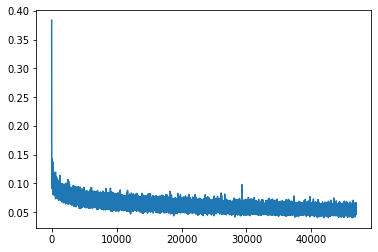

epoch: 26 	 step:0 	 loss: 0.0541
epoch: 26 	 step:100 	 loss: 0.05639
epoch: 26 	 step:200 	 loss: 0.05185
epoch: 26 	 step:300 	 loss: 0.05482
epoch: 26 	 step:400 	 loss: 0.05661
epoch: 26 	 step:500 	 loss: 0.05008
epoch: 26 	 step:600 	 loss: 0.05568
epoch: 26 	 step:700 	 loss: 0.05371
epoch: 26 	 step:800 	 loss: 0.05525
epoch: 26 	 step:900 	 loss: 0.05131
epoch: 26 	 step:1000 	 loss: 0.04895
epoch: 26 	 step:1100 	 loss: 0.06159
epoch: 26 	 step:1200 	 loss: 0.0554
epoch: 26 	 step:1300 	 loss: 0.04799
epoch: 26 	 step:1400 	 loss: 0.05011
epoch: 26 	 step:1500 	 loss: 0.05666
epoch: 26 	 step:1600 	 loss: 0.04859
epoch: 26 	 step:1700 	 loss: 0.05087
epoch: 26 	 step:1800 	 loss: 0.04945


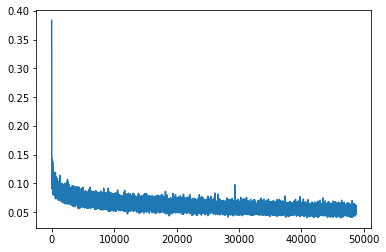

epoch: 27 	 step:0 	 loss: 0.05443
epoch: 27 	 step:100 	 loss: 0.04913
epoch: 27 	 step:200 	 loss: 0.05563
epoch: 27 	 step:300 	 loss: 0.04696
epoch: 27 	 step:400 	 loss: 0.04951
epoch: 27 	 step:500 	 loss: 0.06068
epoch: 27 	 step:600 	 loss: 0.05143
epoch: 27 	 step:700 	 loss: 0.05926
epoch: 27 	 step:800 	 loss: 0.05793
epoch: 27 	 step:900 	 loss: 0.0451
epoch: 27 	 step:1000 	 loss: 0.05109
epoch: 27 	 step:1100 	 loss: 0.06068
epoch: 27 	 step:1200 	 loss: 0.05145
epoch: 27 	 step:1300 	 loss: 0.04829
epoch: 27 	 step:1400 	 loss: 0.04934
epoch: 27 	 step:1500 	 loss: 0.05672
epoch: 27 	 step:1600 	 loss: 0.04703
epoch: 27 	 step:1700 	 loss: 0.05513
epoch: 27 	 step:1800 	 loss: 0.05181


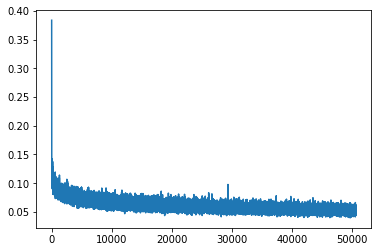

epoch: 28 	 step:0 	 loss: 0.05316
epoch: 28 	 step:100 	 loss: 0.05158
epoch: 28 	 step:200 	 loss: 0.05717
epoch: 28 	 step:300 	 loss: 0.0524
epoch: 28 	 step:400 	 loss: 0.04681
epoch: 28 	 step:500 	 loss: 0.05034
epoch: 28 	 step:600 	 loss: 0.0555
epoch: 28 	 step:700 	 loss: 0.04448
epoch: 28 	 step:800 	 loss: 0.04867
epoch: 28 	 step:900 	 loss: 0.05138
epoch: 28 	 step:1000 	 loss: 0.04618
epoch: 28 	 step:1100 	 loss: 0.04372
epoch: 28 	 step:1200 	 loss: 0.04827
epoch: 28 	 step:1300 	 loss: 0.05852
epoch: 28 	 step:1400 	 loss: 0.05423
epoch: 28 	 step:1500 	 loss: 0.04936
epoch: 28 	 step:1600 	 loss: 0.05027
epoch: 28 	 step:1700 	 loss: 0.05053
epoch: 28 	 step:1800 	 loss: 0.05403


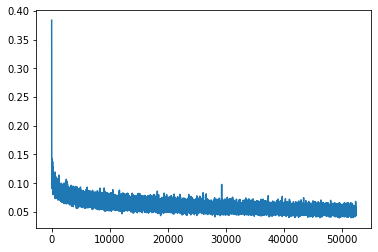

epoch: 29 	 step:0 	 loss: 0.04713
epoch: 29 	 step:100 	 loss: 0.04722
epoch: 29 	 step:200 	 loss: 0.05408
epoch: 29 	 step:300 	 loss: 0.05192
epoch: 29 	 step:400 	 loss: 0.04713
epoch: 29 	 step:500 	 loss: 0.0545
epoch: 29 	 step:600 	 loss: 0.0499
epoch: 29 	 step:700 	 loss: 0.05119
epoch: 29 	 step:800 	 loss: 0.05099
epoch: 29 	 step:900 	 loss: 0.04857
epoch: 29 	 step:1000 	 loss: 0.05053
epoch: 29 	 step:1100 	 loss: 0.05093
epoch: 29 	 step:1200 	 loss: 0.05034
epoch: 29 	 step:1300 	 loss: 0.04934
epoch: 29 	 step:1400 	 loss: 0.05347
epoch: 29 	 step:1500 	 loss: 0.05527
epoch: 29 	 step:1600 	 loss: 0.04807
epoch: 29 	 step:1700 	 loss: 0.05526
epoch: 29 	 step:1800 	 loss: 0.05243


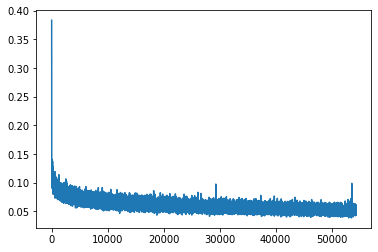

epoch: 30 	 step:0 	 loss: 0.05138
epoch: 30 	 step:100 	 loss: 0.04531
epoch: 30 	 step:200 	 loss: 0.05091
epoch: 30 	 step:300 	 loss: 0.05312
epoch: 30 	 step:400 	 loss: 0.04877
epoch: 30 	 step:500 	 loss: 0.05015
epoch: 30 	 step:600 	 loss: 0.05206
epoch: 30 	 step:700 	 loss: 0.04889
epoch: 30 	 step:800 	 loss: 0.05171
epoch: 30 	 step:900 	 loss: 0.05278
epoch: 30 	 step:1000 	 loss: 0.04429
epoch: 30 	 step:1100 	 loss: 0.05406
epoch: 30 	 step:1200 	 loss: 0.05078
epoch: 30 	 step:1300 	 loss: 0.05853
epoch: 30 	 step:1400 	 loss: 0.04761
epoch: 30 	 step:1500 	 loss: 0.04791
epoch: 30 	 step:1600 	 loss: 0.05032
epoch: 30 	 step:1700 	 loss: 0.04795
epoch: 30 	 step:1800 	 loss: 0.04821


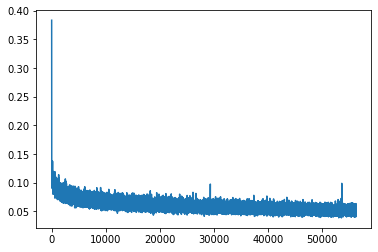

epoch: 31 	 step:0 	 loss: 0.05212
epoch: 31 	 step:100 	 loss: 0.05428
epoch: 31 	 step:200 	 loss: 0.05246
epoch: 31 	 step:300 	 loss: 0.04812
epoch: 31 	 step:400 	 loss: 0.05537
epoch: 31 	 step:500 	 loss: 0.05048
epoch: 31 	 step:600 	 loss: 0.05341
epoch: 31 	 step:700 	 loss: 0.04489
epoch: 31 	 step:800 	 loss: 0.05268
epoch: 31 	 step:900 	 loss: 0.04982
epoch: 31 	 step:1000 	 loss: 0.04779
epoch: 31 	 step:1100 	 loss: 0.05008
epoch: 31 	 step:1200 	 loss: 0.04729
epoch: 31 	 step:1300 	 loss: 0.04701
epoch: 31 	 step:1400 	 loss: 0.05062
epoch: 31 	 step:1500 	 loss: 0.05239
epoch: 31 	 step:1600 	 loss: 0.05135
epoch: 31 	 step:1700 	 loss: 0.05044
epoch: 31 	 step:1800 	 loss: 0.05617


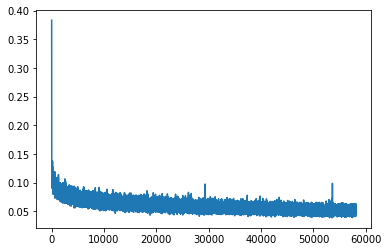

epoch: 32 	 step:0 	 loss: 0.0447
epoch: 32 	 step:100 	 loss: 0.04605
epoch: 32 	 step:200 	 loss: 0.04996
epoch: 32 	 step:300 	 loss: 0.05222
epoch: 32 	 step:400 	 loss: 0.05464
epoch: 32 	 step:500 	 loss: 0.04309
epoch: 32 	 step:600 	 loss: 0.05136
epoch: 32 	 step:700 	 loss: 0.04759
epoch: 32 	 step:800 	 loss: 0.04892
epoch: 32 	 step:900 	 loss: 0.0498
epoch: 32 	 step:1000 	 loss: 0.05007
epoch: 32 	 step:1100 	 loss: 0.05243
epoch: 32 	 step:1200 	 loss: 0.0497
epoch: 32 	 step:1300 	 loss: 0.04749
epoch: 32 	 step:1400 	 loss: 0.0559
epoch: 32 	 step:1500 	 loss: 0.04806
epoch: 32 	 step:1600 	 loss: 0.05417
epoch: 32 	 step:1700 	 loss: 0.04207
epoch: 32 	 step:1800 	 loss: 0.05714


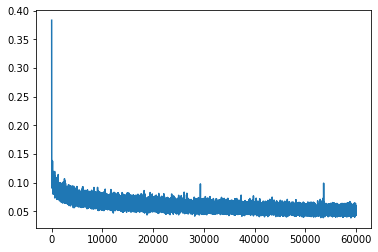

epoch: 33 	 step:0 	 loss: 0.04766
epoch: 33 	 step:100 	 loss: 0.04894
epoch: 33 	 step:200 	 loss: 0.04664
epoch: 33 	 step:300 	 loss: 0.05042
epoch: 33 	 step:400 	 loss: 0.05591
epoch: 33 	 step:500 	 loss: 0.0511
epoch: 33 	 step:600 	 loss: 0.05013
epoch: 33 	 step:700 	 loss: 0.05513
epoch: 33 	 step:800 	 loss: 0.04533
epoch: 33 	 step:900 	 loss: 0.04466
epoch: 33 	 step:1000 	 loss: 0.05242
epoch: 33 	 step:1100 	 loss: 0.0424
epoch: 33 	 step:1200 	 loss: 0.04951
epoch: 33 	 step:1300 	 loss: 0.04892
epoch: 33 	 step:1400 	 loss: 0.05288
epoch: 33 	 step:1500 	 loss: 0.05363
epoch: 33 	 step:1600 	 loss: 0.05078
epoch: 33 	 step:1700 	 loss: 0.04934
epoch: 33 	 step:1800 	 loss: 0.04916


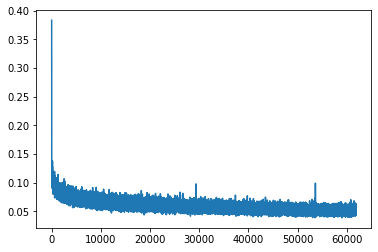

epoch: 34 	 step:0 	 loss: 0.04344
epoch: 34 	 step:100 	 loss: 0.04604
epoch: 34 	 step:200 	 loss: 0.04925
epoch: 34 	 step:300 	 loss: 0.05204
epoch: 34 	 step:400 	 loss: 0.04678
epoch: 34 	 step:500 	 loss: 0.05006
epoch: 34 	 step:600 	 loss: 0.05609
epoch: 34 	 step:700 	 loss: 0.04906
epoch: 34 	 step:800 	 loss: 0.04861
epoch: 34 	 step:900 	 loss: 0.05656
epoch: 34 	 step:1000 	 loss: 0.0523
epoch: 34 	 step:1100 	 loss: 0.05008
epoch: 34 	 step:1200 	 loss: 0.0439
epoch: 34 	 step:1300 	 loss: 0.0491
epoch: 34 	 step:1400 	 loss: 0.05653
epoch: 34 	 step:1500 	 loss: 0.05048
epoch: 34 	 step:1600 	 loss: 0.04462
epoch: 34 	 step:1700 	 loss: 0.05397
epoch: 34 	 step:1800 	 loss: 0.05009


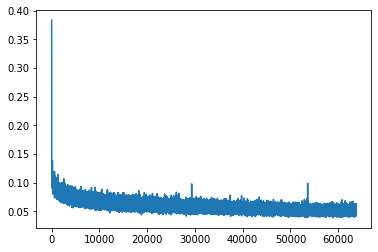

epoch: 35 	 step:0 	 loss: 0.04601
epoch: 35 	 step:100 	 loss: 0.04652
epoch: 35 	 step:200 	 loss: 0.04522
epoch: 35 	 step:300 	 loss: 0.05806
epoch: 35 	 step:400 	 loss: 0.04574
epoch: 35 	 step:500 	 loss: 0.04073
epoch: 35 	 step:600 	 loss: 0.05121
epoch: 35 	 step:700 	 loss: 0.05242
epoch: 35 	 step:800 	 loss: 0.05044
epoch: 35 	 step:900 	 loss: 0.05285
epoch: 35 	 step:1000 	 loss: 0.04518
epoch: 35 	 step:1100 	 loss: 0.04572
epoch: 35 	 step:1200 	 loss: 0.05071
epoch: 35 	 step:1300 	 loss: 0.04751
epoch: 35 	 step:1400 	 loss: 0.04621
epoch: 35 	 step:1500 	 loss: 0.05631
epoch: 35 	 step:1600 	 loss: 0.05595
epoch: 35 	 step:1700 	 loss: 0.0494
epoch: 35 	 step:1800 	 loss: 0.05233


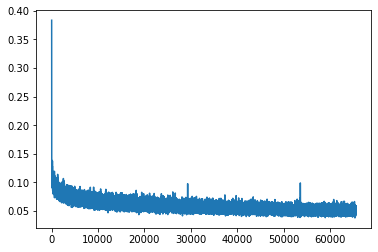

epoch: 36 	 step:0 	 loss: 0.04819
epoch: 36 	 step:100 	 loss: 0.04528
epoch: 36 	 step:200 	 loss: 0.04688
epoch: 36 	 step:300 	 loss: 0.0477
epoch: 36 	 step:400 	 loss: 0.05543
epoch: 36 	 step:500 	 loss: 0.0544
epoch: 36 	 step:600 	 loss: 0.05791
epoch: 36 	 step:700 	 loss: 0.05961
epoch: 36 	 step:800 	 loss: 0.04889
epoch: 36 	 step:900 	 loss: 0.04373
epoch: 36 	 step:1000 	 loss: 0.05214
epoch: 36 	 step:1100 	 loss: 0.05339
epoch: 36 	 step:1200 	 loss: 0.05617
epoch: 36 	 step:1300 	 loss: 0.05019
epoch: 36 	 step:1400 	 loss: 0.05195
epoch: 36 	 step:1500 	 loss: 0.05753
epoch: 36 	 step:1600 	 loss: 0.04506
epoch: 36 	 step:1700 	 loss: 0.05079
epoch: 36 	 step:1800 	 loss: 0.04872


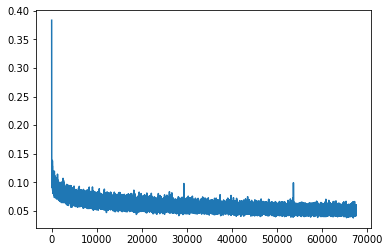

epoch: 37 	 step:0 	 loss: 0.04988
epoch: 37 	 step:100 	 loss: 0.0504
epoch: 37 	 step:200 	 loss: 0.04675
epoch: 37 	 step:300 	 loss: 0.04787
epoch: 37 	 step:400 	 loss: 0.04654
epoch: 37 	 step:500 	 loss: 0.04451
epoch: 37 	 step:600 	 loss: 0.04159
epoch: 37 	 step:700 	 loss: 0.0471
epoch: 37 	 step:800 	 loss: 0.05627
epoch: 37 	 step:900 	 loss: 0.04539
epoch: 37 	 step:1000 	 loss: 0.0451
epoch: 37 	 step:1100 	 loss: 0.05388
epoch: 37 	 step:1200 	 loss: 0.05861
epoch: 37 	 step:1300 	 loss: 0.04181
epoch: 37 	 step:1400 	 loss: 0.04843
epoch: 37 	 step:1500 	 loss: 0.04671
epoch: 37 	 step:1600 	 loss: 0.0461
epoch: 37 	 step:1700 	 loss: 0.0482
epoch: 37 	 step:1800 	 loss: 0.04916


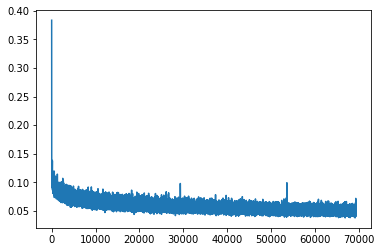

epoch: 38 	 step:0 	 loss: 0.05379
epoch: 38 	 step:100 	 loss: 0.04894
epoch: 38 	 step:200 	 loss: 0.0487
epoch: 38 	 step:300 	 loss: 0.04717
epoch: 38 	 step:400 	 loss: 0.04757
epoch: 38 	 step:500 	 loss: 0.04841
epoch: 38 	 step:600 	 loss: 0.05084
epoch: 38 	 step:700 	 loss: 0.05162
epoch: 38 	 step:800 	 loss: 0.04313
epoch: 38 	 step:900 	 loss: 0.04623
epoch: 38 	 step:1000 	 loss: 0.04231
epoch: 38 	 step:1100 	 loss: 0.05451
epoch: 38 	 step:1200 	 loss: 0.04689
epoch: 38 	 step:1300 	 loss: 0.04749
epoch: 38 	 step:1400 	 loss: 0.04705
epoch: 38 	 step:1500 	 loss: 0.05138
epoch: 38 	 step:1600 	 loss: 0.05287
epoch: 38 	 step:1700 	 loss: 0.05563
epoch: 38 	 step:1800 	 loss: 0.0522


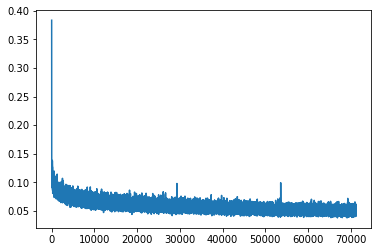

epoch: 39 	 step:0 	 loss: 0.04668
epoch: 39 	 step:100 	 loss: 0.05007
epoch: 39 	 step:200 	 loss: 0.04725
epoch: 39 	 step:300 	 loss: 0.04627
epoch: 39 	 step:400 	 loss: 0.04652
epoch: 39 	 step:500 	 loss: 0.04621
epoch: 39 	 step:600 	 loss: 0.04138
epoch: 39 	 step:700 	 loss: 0.04146
epoch: 39 	 step:800 	 loss: 0.04284
epoch: 39 	 step:900 	 loss: 0.04545
epoch: 39 	 step:1000 	 loss: 0.042
epoch: 39 	 step:1100 	 loss: 0.04762
epoch: 39 	 step:1200 	 loss: 0.0609
epoch: 39 	 step:1300 	 loss: 0.05876
epoch: 39 	 step:1400 	 loss: 0.04986
epoch: 39 	 step:1500 	 loss: 0.04403
epoch: 39 	 step:1600 	 loss: 0.05065
epoch: 39 	 step:1700 	 loss: 0.05376
epoch: 39 	 step:1800 	 loss: 0.05533


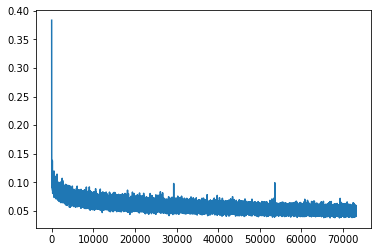

epoch: 40 	 step:0 	 loss: 0.05
epoch: 40 	 step:100 	 loss: 0.04854
epoch: 40 	 step:200 	 loss: 0.05925
epoch: 40 	 step:300 	 loss: 0.04356
epoch: 40 	 step:400 	 loss: 0.04557
epoch: 40 	 step:500 	 loss: 0.04322
epoch: 40 	 step:600 	 loss: 0.05018
epoch: 40 	 step:700 	 loss: 0.04778
epoch: 40 	 step:800 	 loss: 0.04348
epoch: 40 	 step:900 	 loss: 0.04819
epoch: 40 	 step:1000 	 loss: 0.04638
epoch: 40 	 step:1100 	 loss: 0.04602
epoch: 40 	 step:1200 	 loss: 0.04909
epoch: 40 	 step:1300 	 loss: 0.04587
epoch: 40 	 step:1400 	 loss: 0.05084
epoch: 40 	 step:1500 	 loss: 0.04493
epoch: 40 	 step:1600 	 loss: 0.04532
epoch: 40 	 step:1700 	 loss: 0.04624
epoch: 40 	 step:1800 	 loss: 0.05077


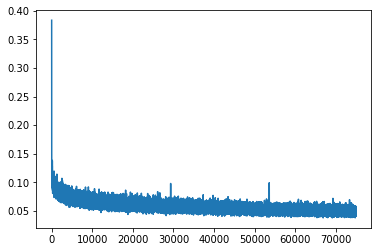

epoch: 41 	 step:0 	 loss: 0.05076
epoch: 41 	 step:100 	 loss: 0.04221
epoch: 41 	 step:200 	 loss: 0.05207
epoch: 41 	 step:300 	 loss: 0.0525
epoch: 41 	 step:400 	 loss: 0.04545
epoch: 41 	 step:500 	 loss: 0.0476
epoch: 41 	 step:600 	 loss: 0.04796
epoch: 41 	 step:700 	 loss: 0.04854
epoch: 41 	 step:800 	 loss: 0.05666
epoch: 41 	 step:900 	 loss: 0.05107
epoch: 41 	 step:1000 	 loss: 0.04557
epoch: 41 	 step:1100 	 loss: 0.04362
epoch: 41 	 step:1200 	 loss: 0.05852
epoch: 41 	 step:1300 	 loss: 0.05742
epoch: 41 	 step:1400 	 loss: 0.05028
epoch: 41 	 step:1500 	 loss: 0.0508
epoch: 41 	 step:1600 	 loss: 0.04726
epoch: 41 	 step:1700 	 loss: 0.04597
epoch: 41 	 step:1800 	 loss: 0.04909


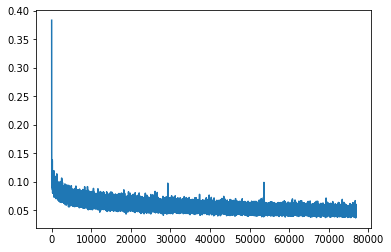

epoch: 42 	 step:0 	 loss: 0.05076
epoch: 42 	 step:100 	 loss: 0.04575
epoch: 42 	 step:200 	 loss: 0.05974
epoch: 42 	 step:300 	 loss: 0.04018
epoch: 42 	 step:400 	 loss: 0.04163
epoch: 42 	 step:500 	 loss: 0.0517
epoch: 42 	 step:600 	 loss: 0.04497
epoch: 42 	 step:700 	 loss: 0.04653
epoch: 42 	 step:800 	 loss: 0.05267
epoch: 42 	 step:900 	 loss: 0.05034
epoch: 42 	 step:1000 	 loss: 0.04613
epoch: 42 	 step:1100 	 loss: 0.04591
epoch: 42 	 step:1200 	 loss: 0.04775
epoch: 42 	 step:1300 	 loss: 0.0505
epoch: 42 	 step:1400 	 loss: 0.0391
epoch: 42 	 step:1500 	 loss: 0.04858
epoch: 42 	 step:1600 	 loss: 0.0468
epoch: 42 	 step:1700 	 loss: 0.04899
epoch: 42 	 step:1800 	 loss: 0.05257


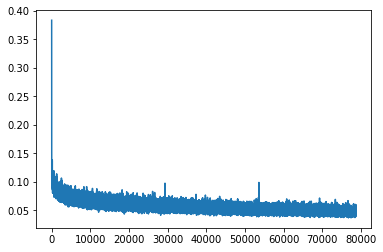

epoch: 43 	 step:0 	 loss: 0.05025
epoch: 43 	 step:100 	 loss: 0.04624
epoch: 43 	 step:200 	 loss: 0.04854
epoch: 43 	 step:300 	 loss: 0.05427
epoch: 43 	 step:400 	 loss: 0.04555
epoch: 43 	 step:500 	 loss: 0.04396
epoch: 43 	 step:600 	 loss: 0.04461
epoch: 43 	 step:700 	 loss: 0.06072
epoch: 43 	 step:800 	 loss: 0.04164
epoch: 43 	 step:900 	 loss: 0.0533
epoch: 43 	 step:1000 	 loss: 0.05289
epoch: 43 	 step:1100 	 loss: 0.04563
epoch: 43 	 step:1200 	 loss: 0.04353
epoch: 43 	 step:1300 	 loss: 0.05163
epoch: 43 	 step:1400 	 loss: 0.05394
epoch: 43 	 step:1500 	 loss: 0.04591
epoch: 43 	 step:1600 	 loss: 0.04352
epoch: 43 	 step:1700 	 loss: 0.05187
epoch: 43 	 step:1800 	 loss: 0.04428


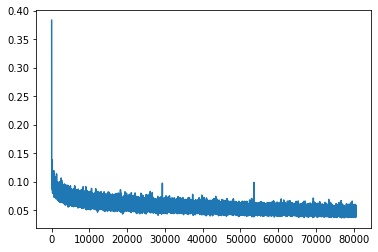

epoch: 44 	 step:0 	 loss: 0.0447
epoch: 44 	 step:100 	 loss: 0.04709
epoch: 44 	 step:200 	 loss: 0.0454
epoch: 44 	 step:300 	 loss: 0.04295
epoch: 44 	 step:400 	 loss: 0.04658
epoch: 44 	 step:500 	 loss: 0.0486
epoch: 44 	 step:600 	 loss: 0.04262
epoch: 44 	 step:700 	 loss: 0.04275
epoch: 44 	 step:800 	 loss: 0.05116
epoch: 44 	 step:900 	 loss: 0.0467
epoch: 44 	 step:1000 	 loss: 0.04391
epoch: 44 	 step:1100 	 loss: 0.04975
epoch: 44 	 step:1200 	 loss: 0.04503
epoch: 44 	 step:1300 	 loss: 0.04604
epoch: 44 	 step:1400 	 loss: 0.05287
epoch: 44 	 step:1500 	 loss: 0.04872
epoch: 44 	 step:1600 	 loss: 0.04684
epoch: 44 	 step:1700 	 loss: 0.04642
epoch: 44 	 step:1800 	 loss: 0.04535


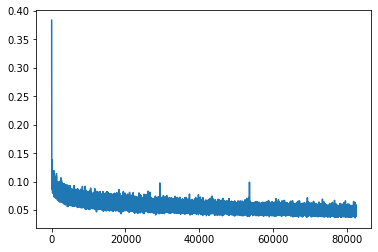

epoch: 45 	 step:0 	 loss: 0.04071
epoch: 45 	 step:100 	 loss: 0.05236
epoch: 45 	 step:200 	 loss: 0.0503
epoch: 45 	 step:300 	 loss: 0.04099
epoch: 45 	 step:400 	 loss: 0.04585
epoch: 45 	 step:500 	 loss: 0.04695
epoch: 45 	 step:600 	 loss: 0.05368
epoch: 45 	 step:700 	 loss: 0.04501
epoch: 45 	 step:800 	 loss: 0.05451
epoch: 45 	 step:900 	 loss: 0.04734
epoch: 45 	 step:1000 	 loss: 0.04908
epoch: 45 	 step:1100 	 loss: 0.04466
epoch: 45 	 step:1200 	 loss: 0.04621
epoch: 45 	 step:1300 	 loss: 0.04484
epoch: 45 	 step:1400 	 loss: 0.05277
epoch: 45 	 step:1500 	 loss: 0.04437
epoch: 45 	 step:1600 	 loss: 0.04381
epoch: 45 	 step:1700 	 loss: 0.03983
epoch: 45 	 step:1800 	 loss: 0.04497


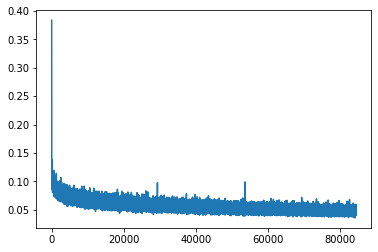

epoch: 46 	 step:0 	 loss: 0.04263
epoch: 46 	 step:100 	 loss: 0.04503
epoch: 46 	 step:200 	 loss: 0.04617
epoch: 46 	 step:300 	 loss: 0.03913
epoch: 46 	 step:400 	 loss: 0.04914
epoch: 46 	 step:500 	 loss: 0.0426
epoch: 46 	 step:600 	 loss: 0.0438
epoch: 46 	 step:700 	 loss: 0.05
epoch: 46 	 step:800 	 loss: 0.04127
epoch: 46 	 step:900 	 loss: 0.05038
epoch: 46 	 step:1000 	 loss: 0.0459
epoch: 46 	 step:1100 	 loss: 0.04562
epoch: 46 	 step:1200 	 loss: 0.04637
epoch: 46 	 step:1300 	 loss: 0.04743
epoch: 46 	 step:1400 	 loss: 0.05569
epoch: 46 	 step:1500 	 loss: 0.04923
epoch: 46 	 step:1600 	 loss: 0.04671
epoch: 46 	 step:1700 	 loss: 0.05045
epoch: 46 	 step:1800 	 loss: 0.04356


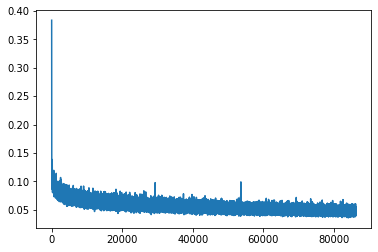

epoch: 47 	 step:0 	 loss: 0.04317
epoch: 47 	 step:100 	 loss: 0.0497
epoch: 47 	 step:200 	 loss: 0.04107
epoch: 47 	 step:300 	 loss: 0.04107
epoch: 47 	 step:400 	 loss: 0.0474
epoch: 47 	 step:500 	 loss: 0.03856
epoch: 47 	 step:600 	 loss: 0.04071
epoch: 47 	 step:700 	 loss: 0.04623
epoch: 47 	 step:800 	 loss: 0.04894
epoch: 47 	 step:900 	 loss: 0.04659
epoch: 47 	 step:1000 	 loss: 0.0462
epoch: 47 	 step:1100 	 loss: 0.04755
epoch: 47 	 step:1200 	 loss: 0.04604
epoch: 47 	 step:1300 	 loss: 0.05546
epoch: 47 	 step:1400 	 loss: 0.05087
epoch: 47 	 step:1500 	 loss: 0.05217
epoch: 47 	 step:1600 	 loss: 0.04188
epoch: 47 	 step:1700 	 loss: 0.04974
epoch: 47 	 step:1800 	 loss: 0.04862


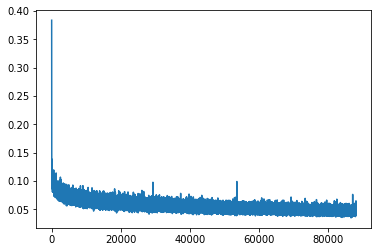

epoch: 48 	 step:0 	 loss: 0.04406
epoch: 48 	 step:100 	 loss: 0.04804
epoch: 48 	 step:200 	 loss: 0.04767
epoch: 48 	 step:300 	 loss: 0.04409
epoch: 48 	 step:400 	 loss: 0.05295
epoch: 48 	 step:500 	 loss: 0.04147
epoch: 48 	 step:600 	 loss: 0.04128
epoch: 48 	 step:700 	 loss: 0.04521
epoch: 48 	 step:800 	 loss: 0.04223
epoch: 48 	 step:900 	 loss: 0.04597
epoch: 48 	 step:1000 	 loss: 0.04023
epoch: 48 	 step:1100 	 loss: 0.0438
epoch: 48 	 step:1200 	 loss: 0.046
epoch: 48 	 step:1300 	 loss: 0.052
epoch: 48 	 step:1400 	 loss: 0.05174
epoch: 48 	 step:1500 	 loss: 0.04659
epoch: 48 	 step:1600 	 loss: 0.04961
epoch: 48 	 step:1700 	 loss: 0.04731
epoch: 48 	 step:1800 	 loss: 0.04393


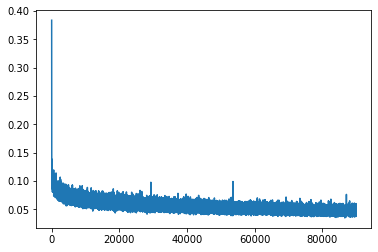

epoch: 49 	 step:0 	 loss: 0.04619
epoch: 49 	 step:100 	 loss: 0.04696
epoch: 49 	 step:200 	 loss: 0.04772
epoch: 49 	 step:300 	 loss: 0.0474
epoch: 49 	 step:400 	 loss: 0.04651
epoch: 49 	 step:500 	 loss: 0.04271
epoch: 49 	 step:600 	 loss: 0.04482
epoch: 49 	 step:700 	 loss: 0.04396
epoch: 49 	 step:800 	 loss: 0.04316
epoch: 49 	 step:900 	 loss: 0.04243
epoch: 49 	 step:1000 	 loss: 0.04455
epoch: 49 	 step:1100 	 loss: 0.04742
epoch: 49 	 step:1200 	 loss: 0.04614
epoch: 49 	 step:1300 	 loss: 0.04514
epoch: 49 	 step:1400 	 loss: 0.04908
epoch: 49 	 step:1500 	 loss: 0.04466
epoch: 49 	 step:1600 	 loss: 0.04611
epoch: 49 	 step:1700 	 loss: 0.05013
epoch: 49 	 step:1800 	 loss: 0.05568


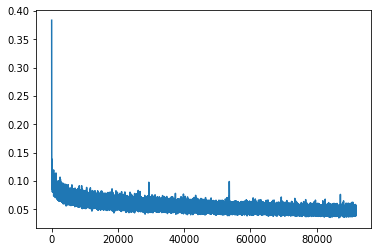

epoch: 50 	 step:0 	 loss: 0.04666
epoch: 50 	 step:100 	 loss: 0.04126
epoch: 50 	 step:200 	 loss: 0.04419
epoch: 50 	 step:300 	 loss: 0.04757
epoch: 50 	 step:400 	 loss: 0.04714
epoch: 50 	 step:500 	 loss: 0.0435
epoch: 50 	 step:600 	 loss: 0.05045
epoch: 50 	 step:700 	 loss: 0.04469
epoch: 50 	 step:800 	 loss: 0.04053
epoch: 50 	 step:900 	 loss: 0.05398
epoch: 50 	 step:1000 	 loss: 0.04856
epoch: 50 	 step:1100 	 loss: 0.04153
epoch: 50 	 step:1200 	 loss: 0.04758
epoch: 50 	 step:1300 	 loss: 0.04941
epoch: 50 	 step:1400 	 loss: 0.05324
epoch: 50 	 step:1500 	 loss: 0.04283
epoch: 50 	 step:1600 	 loss: 0.04471
epoch: 50 	 step:1700 	 loss: 0.04807
epoch: 50 	 step:1800 	 loss: 0.04383


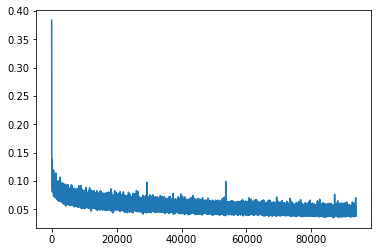

epoch: 51 	 step:0 	 loss: 0.04413
epoch: 51 	 step:100 	 loss: 0.04566
epoch: 51 	 step:200 	 loss: 0.04172
epoch: 51 	 step:300 	 loss: 0.04904
epoch: 51 	 step:400 	 loss: 0.04925
epoch: 51 	 step:500 	 loss: 0.05148
epoch: 51 	 step:600 	 loss: 0.04195
epoch: 51 	 step:700 	 loss: 0.0485
epoch: 51 	 step:800 	 loss: 0.05167
epoch: 51 	 step:900 	 loss: 0.05057
epoch: 51 	 step:1000 	 loss: 0.04381
epoch: 51 	 step:1100 	 loss: 0.0463
epoch: 51 	 step:1200 	 loss: 0.05208
epoch: 51 	 step:1300 	 loss: 0.04921
epoch: 51 	 step:1400 	 loss: 0.04986
epoch: 51 	 step:1500 	 loss: 0.05309
epoch: 51 	 step:1600 	 loss: 0.04581
epoch: 51 	 step:1700 	 loss: 0.04729
epoch: 51 	 step:1800 	 loss: 0.04984


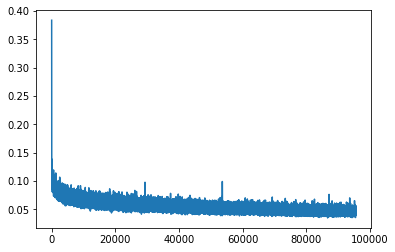

epoch: 52 	 step:0 	 loss: 0.04248
epoch: 52 	 step:100 	 loss: 0.04542
epoch: 52 	 step:200 	 loss: 0.04976
epoch: 52 	 step:300 	 loss: 0.0387
epoch: 52 	 step:400 	 loss: 0.04274
epoch: 52 	 step:500 	 loss: 0.04359
epoch: 52 	 step:600 	 loss: 0.04314
epoch: 52 	 step:700 	 loss: 0.04672
epoch: 52 	 step:800 	 loss: 0.04569
epoch: 52 	 step:900 	 loss: 0.04629
epoch: 52 	 step:1000 	 loss: 0.04005
epoch: 52 	 step:1100 	 loss: 0.04609
epoch: 52 	 step:1200 	 loss: 0.04264
epoch: 52 	 step:1300 	 loss: 0.04342
epoch: 52 	 step:1400 	 loss: 0.04587
epoch: 52 	 step:1500 	 loss: 0.04895
epoch: 52 	 step:1600 	 loss: 0.04374
epoch: 52 	 step:1700 	 loss: 0.04404
epoch: 52 	 step:1800 	 loss: 0.05051


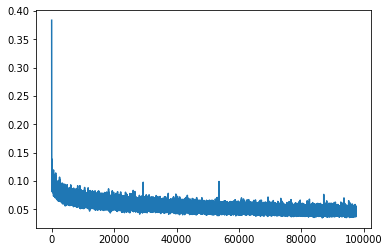

epoch: 53 	 step:0 	 loss: 0.04377
epoch: 53 	 step:100 	 loss: 0.04639
epoch: 53 	 step:200 	 loss: 0.04238
epoch: 53 	 step:300 	 loss: 0.04372
epoch: 53 	 step:400 	 loss: 0.05556
epoch: 53 	 step:500 	 loss: 0.04865
epoch: 53 	 step:600 	 loss: 0.0471
epoch: 53 	 step:700 	 loss: 0.04228
epoch: 53 	 step:800 	 loss: 0.04453
epoch: 53 	 step:900 	 loss: 0.04028
epoch: 53 	 step:1000 	 loss: 0.04576
epoch: 53 	 step:1100 	 loss: 0.04728
epoch: 53 	 step:1200 	 loss: 0.04147
epoch: 53 	 step:1300 	 loss: 0.04337
epoch: 53 	 step:1400 	 loss: 0.04493
epoch: 53 	 step:1500 	 loss: 0.05186
epoch: 53 	 step:1600 	 loss: 0.03872
epoch: 53 	 step:1700 	 loss: 0.04492
epoch: 53 	 step:1800 	 loss: 0.04699


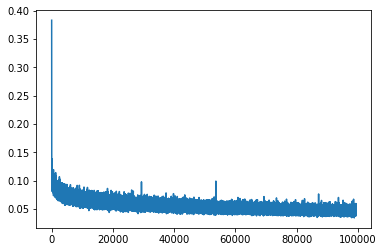

epoch: 54 	 step:0 	 loss: 0.04487
epoch: 54 	 step:100 	 loss: 0.04733
epoch: 54 	 step:200 	 loss: 0.04778
epoch: 54 	 step:300 	 loss: 0.04407
epoch: 54 	 step:400 	 loss: 0.0405
epoch: 54 	 step:500 	 loss: 0.04773
epoch: 54 	 step:600 	 loss: 0.04334
epoch: 54 	 step:700 	 loss: 0.04749
epoch: 54 	 step:800 	 loss: 0.04844
epoch: 54 	 step:900 	 loss: 0.05008
epoch: 54 	 step:1000 	 loss: 0.04602
epoch: 54 	 step:1100 	 loss: 0.04121
epoch: 54 	 step:1200 	 loss: 0.04413
epoch: 54 	 step:1300 	 loss: 0.04228
epoch: 54 	 step:1400 	 loss: 0.03972
epoch: 54 	 step:1500 	 loss: 0.04293
epoch: 54 	 step:1600 	 loss: 0.04429
epoch: 54 	 step:1700 	 loss: 0.04678
epoch: 54 	 step:1800 	 loss: 0.03852


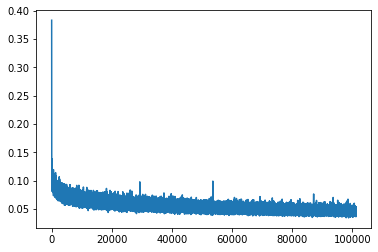

epoch: 55 	 step:0 	 loss: 0.04205
epoch: 55 	 step:100 	 loss: 0.05177
epoch: 55 	 step:200 	 loss: 0.04635
epoch: 55 	 step:300 	 loss: 0.04562
epoch: 55 	 step:400 	 loss: 0.03922
epoch: 55 	 step:500 	 loss: 0.04503
epoch: 55 	 step:600 	 loss: 0.046
epoch: 55 	 step:700 	 loss: 0.04593
epoch: 55 	 step:800 	 loss: 0.04588
epoch: 55 	 step:900 	 loss: 0.04625
epoch: 55 	 step:1000 	 loss: 0.04371
epoch: 55 	 step:1100 	 loss: 0.04495
epoch: 55 	 step:1200 	 loss: 0.04905
epoch: 55 	 step:1300 	 loss: 0.04512
epoch: 55 	 step:1400 	 loss: 0.04889
epoch: 55 	 step:1500 	 loss: 0.0498
epoch: 55 	 step:1600 	 loss: 0.04189
epoch: 55 	 step:1700 	 loss: 0.04421
epoch: 55 	 step:1800 	 loss: 0.04495


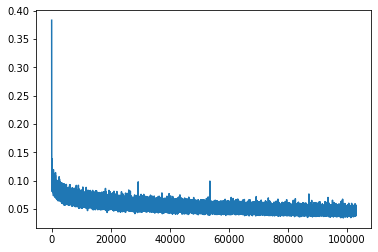

epoch: 56 	 step:0 	 loss: 0.05021
epoch: 56 	 step:100 	 loss: 0.038
epoch: 56 	 step:200 	 loss: 0.04203
epoch: 56 	 step:300 	 loss: 0.04317
epoch: 56 	 step:400 	 loss: 0.04186
epoch: 56 	 step:500 	 loss: 0.046
epoch: 56 	 step:600 	 loss: 0.04432
epoch: 56 	 step:700 	 loss: 0.03946
epoch: 56 	 step:800 	 loss: 0.0415
epoch: 56 	 step:900 	 loss: 0.04094
epoch: 56 	 step:1000 	 loss: 0.04765
epoch: 56 	 step:1100 	 loss: 0.04664
epoch: 56 	 step:1200 	 loss: 0.04699
epoch: 56 	 step:1300 	 loss: 0.04435
epoch: 56 	 step:1400 	 loss: 0.04882
epoch: 56 	 step:1500 	 loss: 0.046
epoch: 56 	 step:1600 	 loss: 0.03862
epoch: 56 	 step:1700 	 loss: 0.04986
epoch: 56 	 step:1800 	 loss: 0.05004


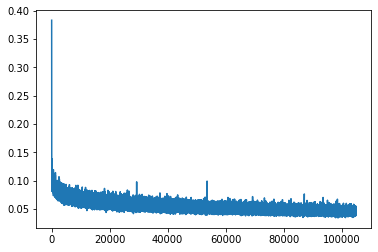

epoch: 57 	 step:0 	 loss: 0.04047
epoch: 57 	 step:100 	 loss: 0.04256
epoch: 57 	 step:200 	 loss: 0.0513
epoch: 57 	 step:300 	 loss: 0.05305
epoch: 57 	 step:400 	 loss: 0.04352
epoch: 57 	 step:500 	 loss: 0.04102
epoch: 57 	 step:600 	 loss: 0.04326
epoch: 57 	 step:700 	 loss: 0.04728
epoch: 57 	 step:800 	 loss: 0.04369
epoch: 57 	 step:900 	 loss: 0.04921
epoch: 57 	 step:1000 	 loss: 0.04367
epoch: 57 	 step:1100 	 loss: 0.04569
epoch: 57 	 step:1200 	 loss: 0.04173
epoch: 57 	 step:1300 	 loss: 0.03936
epoch: 57 	 step:1400 	 loss: 0.04394
epoch: 57 	 step:1500 	 loss: 0.04496
epoch: 57 	 step:1600 	 loss: 0.04096
epoch: 57 	 step:1700 	 loss: 0.04616
epoch: 57 	 step:1800 	 loss: 0.04465


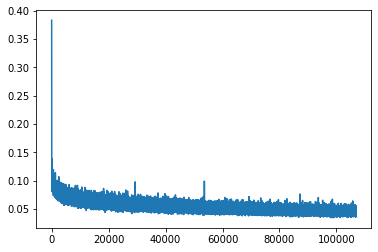

epoch: 58 	 step:0 	 loss: 0.03985
epoch: 58 	 step:100 	 loss: 0.04909
epoch: 58 	 step:200 	 loss: 0.04212
epoch: 58 	 step:300 	 loss: 0.04547
epoch: 58 	 step:400 	 loss: 0.03813
epoch: 58 	 step:500 	 loss: 0.04655
epoch: 58 	 step:600 	 loss: 0.0409
epoch: 58 	 step:700 	 loss: 0.04245
epoch: 58 	 step:800 	 loss: 0.04339
epoch: 58 	 step:900 	 loss: 0.04629
epoch: 58 	 step:1000 	 loss: 0.04839
epoch: 58 	 step:1100 	 loss: 0.0461
epoch: 58 	 step:1200 	 loss: 0.04674
epoch: 58 	 step:1300 	 loss: 0.04447
epoch: 58 	 step:1400 	 loss: 0.04721
epoch: 58 	 step:1500 	 loss: 0.04327
epoch: 58 	 step:1600 	 loss: 0.04914
epoch: 58 	 step:1700 	 loss: 0.04461
epoch: 58 	 step:1800 	 loss: 0.04883


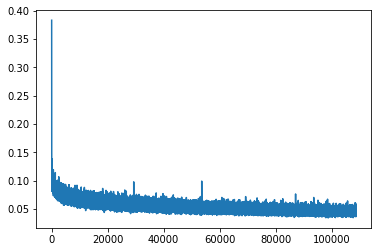

epoch: 59 	 step:0 	 loss: 0.04513
epoch: 59 	 step:100 	 loss: 0.05421
epoch: 59 	 step:200 	 loss: 0.0409
epoch: 59 	 step:300 	 loss: 0.04211
epoch: 59 	 step:400 	 loss: 0.0416
epoch: 59 	 step:500 	 loss: 0.04541
epoch: 59 	 step:600 	 loss: 0.04422
epoch: 59 	 step:700 	 loss: 0.04445
epoch: 59 	 step:800 	 loss: 0.04936
epoch: 59 	 step:900 	 loss: 0.04091
epoch: 59 	 step:1000 	 loss: 0.04264
epoch: 59 	 step:1100 	 loss: 0.03982
epoch: 59 	 step:1200 	 loss: 0.04132
epoch: 59 	 step:1300 	 loss: 0.04437
epoch: 59 	 step:1400 	 loss: 0.04065
epoch: 59 	 step:1500 	 loss: 0.04405
epoch: 59 	 step:1600 	 loss: 0.04593
epoch: 59 	 step:1700 	 loss: 0.04432
epoch: 59 	 step:1800 	 loss: 0.04192


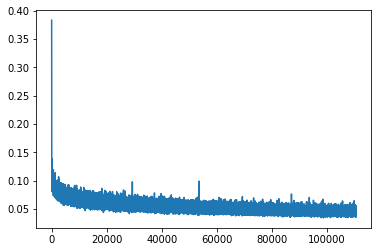

epoch: 60 	 step:0 	 loss: 0.04874
epoch: 60 	 step:100 	 loss: 0.04252
epoch: 60 	 step:200 	 loss: 0.03912
epoch: 60 	 step:300 	 loss: 0.04371
epoch: 60 	 step:400 	 loss: 0.04318
epoch: 60 	 step:500 	 loss: 0.04481
epoch: 60 	 step:600 	 loss: 0.04931
epoch: 60 	 step:700 	 loss: 0.04372
epoch: 60 	 step:800 	 loss: 0.04908
epoch: 60 	 step:900 	 loss: 0.03996
epoch: 60 	 step:1000 	 loss: 0.04868
epoch: 60 	 step:1100 	 loss: 0.04412
epoch: 60 	 step:1200 	 loss: 0.04543
epoch: 60 	 step:1300 	 loss: 0.03811
epoch: 60 	 step:1400 	 loss: 0.0448
epoch: 60 	 step:1500 	 loss: 0.04615
epoch: 60 	 step:1600 	 loss: 0.04698
epoch: 60 	 step:1700 	 loss: 0.03669
epoch: 60 	 step:1800 	 loss: 0.04241


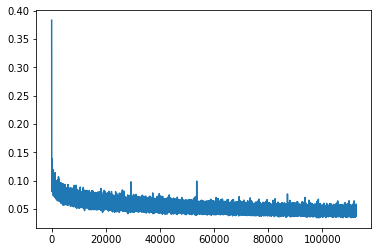

epoch: 61 	 step:0 	 loss: 0.044
epoch: 61 	 step:100 	 loss: 0.04662
epoch: 61 	 step:200 	 loss: 0.04693
epoch: 61 	 step:300 	 loss: 0.0407
epoch: 61 	 step:400 	 loss: 0.04617
epoch: 61 	 step:500 	 loss: 0.04511
epoch: 61 	 step:600 	 loss: 0.04262
epoch: 61 	 step:700 	 loss: 0.03936
epoch: 61 	 step:800 	 loss: 0.04491
epoch: 61 	 step:900 	 loss: 0.04683
epoch: 61 	 step:1000 	 loss: 0.04455
epoch: 61 	 step:1100 	 loss: 0.04119
epoch: 61 	 step:1200 	 loss: 0.03926
epoch: 61 	 step:1300 	 loss: 0.04634
epoch: 61 	 step:1400 	 loss: 0.04322
epoch: 61 	 step:1500 	 loss: 0.04934
epoch: 61 	 step:1600 	 loss: 0.03875
epoch: 61 	 step:1700 	 loss: 0.04655
epoch: 61 	 step:1800 	 loss: 0.04035


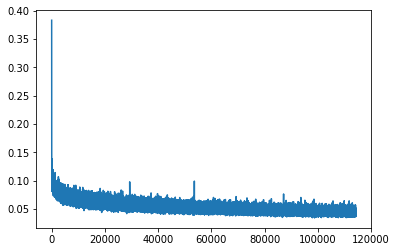

epoch: 62 	 step:0 	 loss: 0.03917
epoch: 62 	 step:100 	 loss: 0.05005
epoch: 62 	 step:200 	 loss: 0.03967
epoch: 62 	 step:300 	 loss: 0.04148
epoch: 62 	 step:400 	 loss: 0.04539
epoch: 62 	 step:500 	 loss: 0.04504
epoch: 62 	 step:600 	 loss: 0.0441
epoch: 62 	 step:700 	 loss: 0.04684
epoch: 62 	 step:800 	 loss: 0.03846
epoch: 62 	 step:900 	 loss: 0.03974
epoch: 62 	 step:1000 	 loss: 0.03843
epoch: 62 	 step:1100 	 loss: 0.04391
epoch: 62 	 step:1200 	 loss: 0.04339
epoch: 62 	 step:1300 	 loss: 0.04442
epoch: 62 	 step:1400 	 loss: 0.04283
epoch: 62 	 step:1500 	 loss: 0.0437
epoch: 62 	 step:1600 	 loss: 0.03689
epoch: 62 	 step:1700 	 loss: 0.0438
epoch: 62 	 step:1800 	 loss: 0.04815


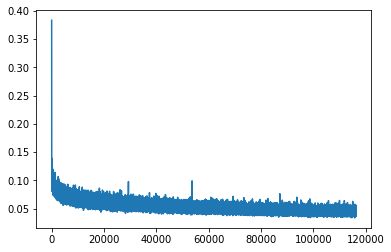

epoch: 63 	 step:0 	 loss: 0.04297
epoch: 63 	 step:100 	 loss: 0.052
epoch: 63 	 step:200 	 loss: 0.04726
epoch: 63 	 step:300 	 loss: 0.04458
epoch: 63 	 step:400 	 loss: 0.04473
epoch: 63 	 step:500 	 loss: 0.04424
epoch: 63 	 step:600 	 loss: 0.04789
epoch: 63 	 step:700 	 loss: 0.04246
epoch: 63 	 step:800 	 loss: 0.04086
epoch: 63 	 step:900 	 loss: 0.04977
epoch: 63 	 step:1000 	 loss: 0.04439
epoch: 63 	 step:1100 	 loss: 0.04355
epoch: 63 	 step:1200 	 loss: 0.0406
epoch: 63 	 step:1300 	 loss: 0.04063
epoch: 63 	 step:1400 	 loss: 0.04845
epoch: 63 	 step:1500 	 loss: 0.04339
epoch: 63 	 step:1600 	 loss: 0.04333
epoch: 63 	 step:1700 	 loss: 0.04535
epoch: 63 	 step:1800 	 loss: 0.05193


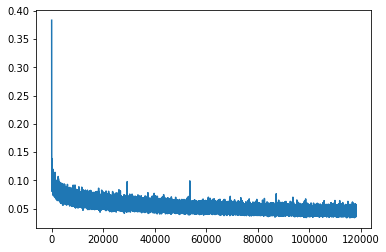

epoch: 64 	 step:0 	 loss: 0.03906
epoch: 64 	 step:100 	 loss: 0.04572
epoch: 64 	 step:200 	 loss: 0.04145
epoch: 64 	 step:300 	 loss: 0.04101
epoch: 64 	 step:400 	 loss: 0.0428
epoch: 64 	 step:500 	 loss: 0.04069
epoch: 64 	 step:600 	 loss: 0.04386
epoch: 64 	 step:700 	 loss: 0.04415
epoch: 64 	 step:800 	 loss: 0.0385
epoch: 64 	 step:900 	 loss: 0.04542
epoch: 64 	 step:1000 	 loss: 0.05271
epoch: 64 	 step:1100 	 loss: 0.03827
epoch: 64 	 step:1200 	 loss: 0.03944
epoch: 64 	 step:1300 	 loss: 0.04292
epoch: 64 	 step:1400 	 loss: 0.0458
epoch: 64 	 step:1500 	 loss: 0.04079
epoch: 64 	 step:1600 	 loss: 0.04052
epoch: 64 	 step:1700 	 loss: 0.04189
epoch: 64 	 step:1800 	 loss: 0.04928


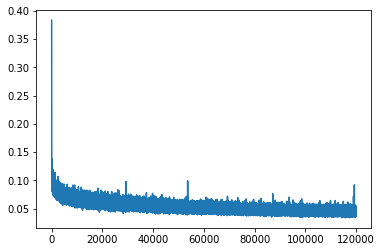

epoch: 65 	 step:0 	 loss: 0.03718
epoch: 65 	 step:100 	 loss: 0.03704
epoch: 65 	 step:200 	 loss: 0.0458
epoch: 65 	 step:300 	 loss: 0.03913
epoch: 65 	 step:400 	 loss: 0.03893
epoch: 65 	 step:500 	 loss: 0.04037
epoch: 65 	 step:600 	 loss: 0.04319
epoch: 65 	 step:700 	 loss: 0.04818
epoch: 65 	 step:800 	 loss: 0.04029
epoch: 65 	 step:900 	 loss: 0.04597
epoch: 65 	 step:1000 	 loss: 0.04658
epoch: 65 	 step:1100 	 loss: 0.04347
epoch: 65 	 step:1200 	 loss: 0.04414
epoch: 65 	 step:1300 	 loss: 0.04772
epoch: 65 	 step:1400 	 loss: 0.04389
epoch: 65 	 step:1500 	 loss: 0.05158
epoch: 65 	 step:1600 	 loss: 0.04389
epoch: 65 	 step:1700 	 loss: 0.04548
epoch: 65 	 step:1800 	 loss: 0.04264


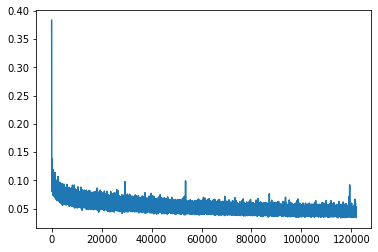

epoch: 66 	 step:0 	 loss: 0.04123
epoch: 66 	 step:100 	 loss: 0.04974
epoch: 66 	 step:200 	 loss: 0.04536
epoch: 66 	 step:300 	 loss: 0.03943
epoch: 66 	 step:400 	 loss: 0.04062
epoch: 66 	 step:500 	 loss: 0.04012
epoch: 66 	 step:600 	 loss: 0.0453
epoch: 66 	 step:700 	 loss: 0.04373
epoch: 66 	 step:800 	 loss: 0.04171
epoch: 66 	 step:900 	 loss: 0.03891
epoch: 66 	 step:1000 	 loss: 0.03937
epoch: 66 	 step:1100 	 loss: 0.0396
epoch: 66 	 step:1200 	 loss: 0.04831
epoch: 66 	 step:1300 	 loss: 0.03982
epoch: 66 	 step:1400 	 loss: 0.03916
epoch: 66 	 step:1500 	 loss: 0.0447
epoch: 66 	 step:1600 	 loss: 0.04138
epoch: 66 	 step:1700 	 loss: 0.0427
epoch: 66 	 step:1800 	 loss: 0.04557


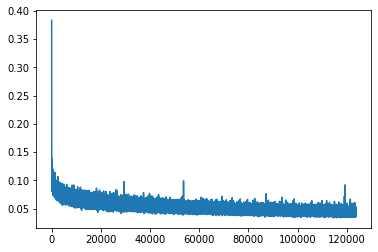

epoch: 67 	 step:0 	 loss: 0.04097
epoch: 67 	 step:100 	 loss: 0.04184
epoch: 67 	 step:200 	 loss: 0.0401
epoch: 67 	 step:300 	 loss: 0.04506
epoch: 67 	 step:400 	 loss: 0.03967
epoch: 67 	 step:500 	 loss: 0.04038
epoch: 67 	 step:600 	 loss: 0.03764
epoch: 67 	 step:700 	 loss: 0.0413
epoch: 67 	 step:800 	 loss: 0.04446
epoch: 67 	 step:900 	 loss: 0.04564
epoch: 67 	 step:1000 	 loss: 0.04186
epoch: 67 	 step:1100 	 loss: 0.04603
epoch: 67 	 step:1200 	 loss: 0.04278
epoch: 67 	 step:1300 	 loss: 0.04615
epoch: 67 	 step:1400 	 loss: 0.03976
epoch: 67 	 step:1500 	 loss: 0.0369
epoch: 67 	 step:1600 	 loss: 0.04102
epoch: 67 	 step:1700 	 loss: 0.03959
epoch: 67 	 step:1800 	 loss: 0.04367


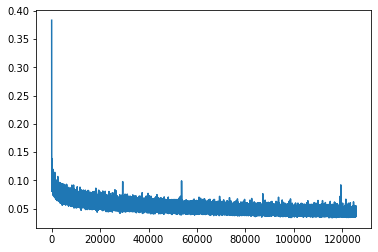

epoch: 68 	 step:0 	 loss: 0.04325
epoch: 68 	 step:100 	 loss: 0.04499
epoch: 68 	 step:200 	 loss: 0.04884
epoch: 68 	 step:300 	 loss: 0.04522
epoch: 68 	 step:400 	 loss: 0.04395
epoch: 68 	 step:500 	 loss: 0.04175
epoch: 68 	 step:600 	 loss: 0.04979
epoch: 68 	 step:700 	 loss: 0.03946
epoch: 68 	 step:800 	 loss: 0.04837
epoch: 68 	 step:900 	 loss: 0.04573
epoch: 68 	 step:1000 	 loss: 0.04281
epoch: 68 	 step:1100 	 loss: 0.04024
epoch: 68 	 step:1200 	 loss: 0.04579
epoch: 68 	 step:1300 	 loss: 0.04936
epoch: 68 	 step:1400 	 loss: 0.04445
epoch: 68 	 step:1500 	 loss: 0.04547
epoch: 68 	 step:1600 	 loss: 0.04534
epoch: 68 	 step:1700 	 loss: 0.04147
epoch: 68 	 step:1800 	 loss: 0.04182


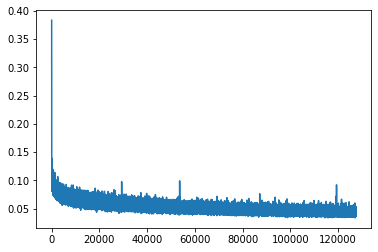

epoch: 69 	 step:0 	 loss: 0.04476
epoch: 69 	 step:100 	 loss: 0.04536
epoch: 69 	 step:200 	 loss: 0.04133
epoch: 69 	 step:300 	 loss: 0.03757
epoch: 69 	 step:400 	 loss: 0.04902
epoch: 69 	 step:500 	 loss: 0.03735
epoch: 69 	 step:600 	 loss: 0.03968
epoch: 69 	 step:700 	 loss: 0.04516
epoch: 69 	 step:800 	 loss: 0.04408
epoch: 69 	 step:900 	 loss: 0.0464
epoch: 69 	 step:1000 	 loss: 0.04379
epoch: 69 	 step:1100 	 loss: 0.04614
epoch: 69 	 step:1200 	 loss: 0.04214
epoch: 69 	 step:1300 	 loss: 0.04199
epoch: 69 	 step:1400 	 loss: 0.04318
epoch: 69 	 step:1500 	 loss: 0.04744
epoch: 69 	 step:1600 	 loss: 0.04548
epoch: 69 	 step:1700 	 loss: 0.04791
epoch: 69 	 step:1800 	 loss: 0.04157


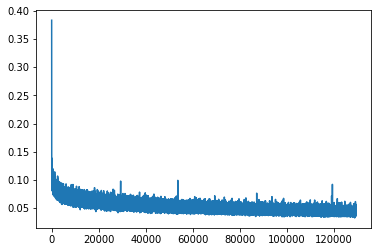

epoch: 70 	 step:0 	 loss: 0.03822
epoch: 70 	 step:100 	 loss: 0.0387
epoch: 70 	 step:200 	 loss: 0.04479
epoch: 70 	 step:300 	 loss: 0.03721
epoch: 70 	 step:400 	 loss: 0.04516
epoch: 70 	 step:500 	 loss: 0.04335
epoch: 70 	 step:600 	 loss: 0.04334
epoch: 70 	 step:700 	 loss: 0.04282
epoch: 70 	 step:800 	 loss: 0.03962
epoch: 70 	 step:900 	 loss: 0.04352
epoch: 70 	 step:1000 	 loss: 0.04035
epoch: 70 	 step:1100 	 loss: 0.03766
epoch: 70 	 step:1200 	 loss: 0.04041
epoch: 70 	 step:1300 	 loss: 0.0423
epoch: 70 	 step:1400 	 loss: 0.04203
epoch: 70 	 step:1500 	 loss: 0.04723
epoch: 70 	 step:1600 	 loss: 0.03931
epoch: 70 	 step:1700 	 loss: 0.04181
epoch: 70 	 step:1800 	 loss: 0.04562


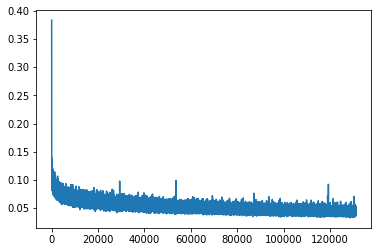

epoch: 71 	 step:0 	 loss: 0.04207
epoch: 71 	 step:100 	 loss: 0.04183
epoch: 71 	 step:200 	 loss: 0.04123
epoch: 71 	 step:300 	 loss: 0.04123
epoch: 71 	 step:400 	 loss: 0.04315
epoch: 71 	 step:500 	 loss: 0.04728
epoch: 71 	 step:600 	 loss: 0.04106
epoch: 71 	 step:700 	 loss: 0.04292
epoch: 71 	 step:800 	 loss: 0.04799
epoch: 71 	 step:900 	 loss: 0.04413
epoch: 71 	 step:1000 	 loss: 0.04373
epoch: 71 	 step:1100 	 loss: 0.04377
epoch: 71 	 step:1200 	 loss: 0.04419
epoch: 71 	 step:1300 	 loss: 0.04224
epoch: 71 	 step:1400 	 loss: 0.04275
epoch: 71 	 step:1500 	 loss: 0.04468
epoch: 71 	 step:1600 	 loss: 0.04741
epoch: 71 	 step:1700 	 loss: 0.04022
epoch: 71 	 step:1800 	 loss: 0.0443


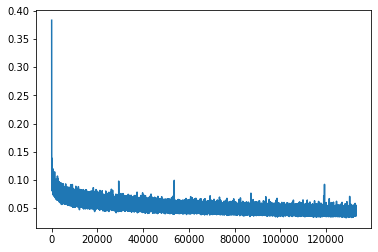

epoch: 72 	 step:0 	 loss: 0.04433
epoch: 72 	 step:100 	 loss: 0.03845
epoch: 72 	 step:200 	 loss: 0.04009
epoch: 72 	 step:300 	 loss: 0.04413
epoch: 72 	 step:400 	 loss: 0.04074
epoch: 72 	 step:500 	 loss: 0.04801
epoch: 72 	 step:600 	 loss: 0.03782
epoch: 72 	 step:700 	 loss: 0.04218
epoch: 72 	 step:800 	 loss: 0.04718
epoch: 72 	 step:900 	 loss: 0.04651
epoch: 72 	 step:1000 	 loss: 0.04487
epoch: 72 	 step:1100 	 loss: 0.0428
epoch: 72 	 step:1200 	 loss: 0.03647
epoch: 72 	 step:1300 	 loss: 0.04386
epoch: 72 	 step:1400 	 loss: 0.04004
epoch: 72 	 step:1500 	 loss: 0.04025
epoch: 72 	 step:1600 	 loss: 0.03763
epoch: 72 	 step:1700 	 loss: 0.04648
epoch: 72 	 step:1800 	 loss: 0.03776


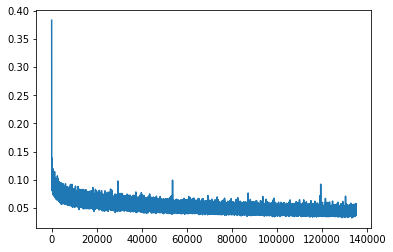

epoch: 73 	 step:0 	 loss: 0.04026
epoch: 73 	 step:100 	 loss: 0.0426
epoch: 73 	 step:200 	 loss: 0.04557
epoch: 73 	 step:300 	 loss: 0.04426
epoch: 73 	 step:400 	 loss: 0.04178
epoch: 73 	 step:500 	 loss: 0.04633
epoch: 73 	 step:600 	 loss: 0.04061
epoch: 73 	 step:700 	 loss: 0.04221
epoch: 73 	 step:800 	 loss: 0.03853
epoch: 73 	 step:900 	 loss: 0.0398
epoch: 73 	 step:1000 	 loss: 0.04698
epoch: 73 	 step:1100 	 loss: 0.04499
epoch: 73 	 step:1200 	 loss: 0.04735
epoch: 73 	 step:1300 	 loss: 0.04323
epoch: 73 	 step:1400 	 loss: 0.0415
epoch: 73 	 step:1500 	 loss: 0.04606
epoch: 73 	 step:1600 	 loss: 0.04475
epoch: 73 	 step:1700 	 loss: 0.04857
epoch: 73 	 step:1800 	 loss: 0.04768


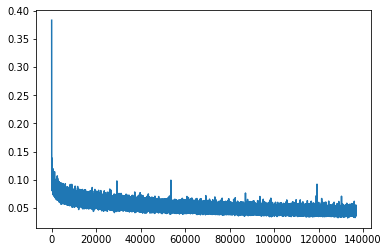

epoch: 74 	 step:0 	 loss: 0.0423
epoch: 74 	 step:100 	 loss: 0.03919
epoch: 74 	 step:200 	 loss: 0.03587
epoch: 74 	 step:300 	 loss: 0.04293
epoch: 74 	 step:400 	 loss: 0.03791
epoch: 74 	 step:500 	 loss: 0.0422
epoch: 74 	 step:600 	 loss: 0.04331
epoch: 74 	 step:700 	 loss: 0.04321
epoch: 74 	 step:800 	 loss: 0.04752
epoch: 74 	 step:900 	 loss: 0.04744
epoch: 74 	 step:1000 	 loss: 0.03883
epoch: 74 	 step:1100 	 loss: 0.04249
epoch: 74 	 step:1200 	 loss: 0.0429
epoch: 74 	 step:1300 	 loss: 0.03911
epoch: 74 	 step:1400 	 loss: 0.04864
epoch: 74 	 step:1500 	 loss: 0.04024
epoch: 74 	 step:1600 	 loss: 0.04023
epoch: 74 	 step:1700 	 loss: 0.04247
epoch: 74 	 step:1800 	 loss: 0.04885


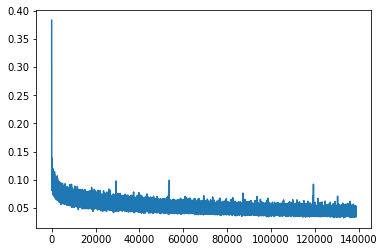

epoch: 75 	 step:0 	 loss: 0.039
epoch: 75 	 step:100 	 loss: 0.04147
epoch: 75 	 step:200 	 loss: 0.04152
epoch: 75 	 step:300 	 loss: 0.04971
epoch: 75 	 step:400 	 loss: 0.04168
epoch: 75 	 step:500 	 loss: 0.04677
epoch: 75 	 step:600 	 loss: 0.04156
epoch: 75 	 step:700 	 loss: 0.04412
epoch: 75 	 step:800 	 loss: 0.03995
epoch: 75 	 step:900 	 loss: 0.04405
epoch: 75 	 step:1000 	 loss: 0.03866
epoch: 75 	 step:1100 	 loss: 0.04033
epoch: 75 	 step:1200 	 loss: 0.04156
epoch: 75 	 step:1300 	 loss: 0.03956
epoch: 75 	 step:1400 	 loss: 0.04036
epoch: 75 	 step:1500 	 loss: 0.04349
epoch: 75 	 step:1600 	 loss: 0.03707
epoch: 75 	 step:1700 	 loss: 0.03739
epoch: 75 	 step:1800 	 loss: 0.03797


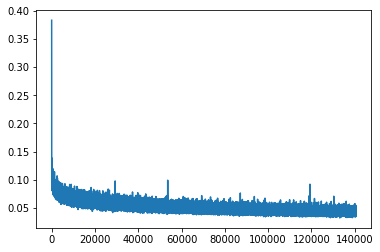

epoch: 76 	 step:0 	 loss: 0.03504
epoch: 76 	 step:100 	 loss: 0.03961
epoch: 76 	 step:200 	 loss: 0.04133
epoch: 76 	 step:300 	 loss: 0.04381
epoch: 76 	 step:400 	 loss: 0.04285
epoch: 76 	 step:500 	 loss: 0.04058
epoch: 76 	 step:600 	 loss: 0.04096
epoch: 76 	 step:700 	 loss: 0.03972
epoch: 76 	 step:800 	 loss: 0.05047
epoch: 76 	 step:900 	 loss: 0.04481
epoch: 76 	 step:1000 	 loss: 0.04326
epoch: 76 	 step:1100 	 loss: 0.04489
epoch: 76 	 step:1200 	 loss: 0.03956
epoch: 76 	 step:1300 	 loss: 0.04674
epoch: 76 	 step:1400 	 loss: 0.03666
epoch: 76 	 step:1500 	 loss: 0.04151
epoch: 76 	 step:1600 	 loss: 0.0423
epoch: 76 	 step:1700 	 loss: 0.0355
epoch: 76 	 step:1800 	 loss: 0.03995


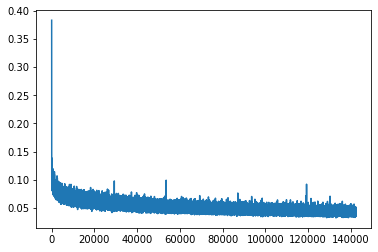

epoch: 77 	 step:0 	 loss: 0.04556
epoch: 77 	 step:100 	 loss: 0.04028
epoch: 77 	 step:200 	 loss: 0.04069
epoch: 77 	 step:300 	 loss: 0.04298
epoch: 77 	 step:400 	 loss: 0.03847
epoch: 77 	 step:500 	 loss: 0.03954
epoch: 77 	 step:600 	 loss: 0.03703
epoch: 77 	 step:700 	 loss: 0.03991
epoch: 77 	 step:800 	 loss: 0.04934
epoch: 77 	 step:900 	 loss: 0.03803
epoch: 77 	 step:1000 	 loss: 0.0465
epoch: 77 	 step:1100 	 loss: 0.03781
epoch: 77 	 step:1200 	 loss: 0.04722
epoch: 77 	 step:1300 	 loss: 0.0442
epoch: 77 	 step:1400 	 loss: 0.03758
epoch: 77 	 step:1500 	 loss: 0.05016
epoch: 77 	 step:1600 	 loss: 0.04431
epoch: 77 	 step:1700 	 loss: 0.04325
epoch: 77 	 step:1800 	 loss: 0.03922


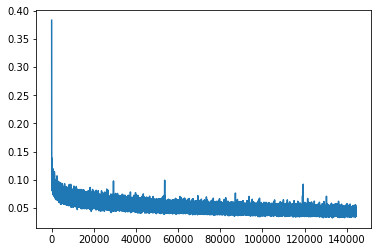

epoch: 78 	 step:0 	 loss: 0.03974
epoch: 78 	 step:100 	 loss: 0.04243
epoch: 78 	 step:200 	 loss: 0.03914
epoch: 78 	 step:300 	 loss: 0.03572
epoch: 78 	 step:400 	 loss: 0.03946
epoch: 78 	 step:500 	 loss: 0.04235
epoch: 78 	 step:600 	 loss: 0.04042
epoch: 78 	 step:700 	 loss: 0.0408
epoch: 78 	 step:800 	 loss: 0.04168
epoch: 78 	 step:900 	 loss: 0.04909
epoch: 78 	 step:1000 	 loss: 0.03785
epoch: 78 	 step:1100 	 loss: 0.04391
epoch: 78 	 step:1200 	 loss: 0.04393
epoch: 78 	 step:1300 	 loss: 0.0391
epoch: 78 	 step:1400 	 loss: 0.03632
epoch: 78 	 step:1500 	 loss: 0.04129
epoch: 78 	 step:1600 	 loss: 0.04333
epoch: 78 	 step:1700 	 loss: 0.03821
epoch: 78 	 step:1800 	 loss: 0.04281


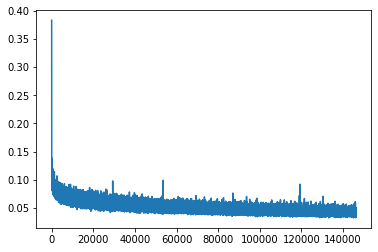

epoch: 79 	 step:0 	 loss: 0.04537
epoch: 79 	 step:100 	 loss: 0.04376
epoch: 79 	 step:200 	 loss: 0.04487
epoch: 79 	 step:300 	 loss: 0.03964
epoch: 79 	 step:400 	 loss: 0.03905
epoch: 79 	 step:500 	 loss: 0.043
epoch: 79 	 step:600 	 loss: 0.04031
epoch: 79 	 step:700 	 loss: 0.03882
epoch: 79 	 step:800 	 loss: 0.03573
epoch: 79 	 step:900 	 loss: 0.0436
epoch: 79 	 step:1000 	 loss: 0.03848
epoch: 79 	 step:1100 	 loss: 0.05122
epoch: 79 	 step:1200 	 loss: 0.043
epoch: 79 	 step:1300 	 loss: 0.03998
epoch: 79 	 step:1400 	 loss: 0.03834
epoch: 79 	 step:1500 	 loss: 0.04276
epoch: 79 	 step:1600 	 loss: 0.04109
epoch: 79 	 step:1700 	 loss: 0.04485
epoch: 79 	 step:1800 	 loss: 0.04043


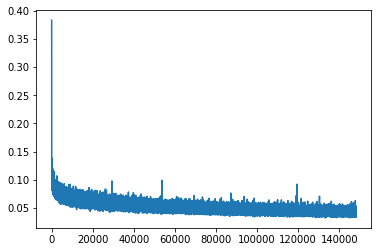

epoch: 80 	 step:0 	 loss: 0.04488
epoch: 80 	 step:100 	 loss: 0.03793
epoch: 80 	 step:200 	 loss: 0.04246
epoch: 80 	 step:300 	 loss: 0.03572
epoch: 80 	 step:400 	 loss: 0.04341
epoch: 80 	 step:500 	 loss: 0.0433
epoch: 80 	 step:600 	 loss: 0.03479
epoch: 80 	 step:700 	 loss: 0.03976
epoch: 80 	 step:800 	 loss: 0.03874
epoch: 80 	 step:900 	 loss: 0.03976
epoch: 80 	 step:1000 	 loss: 0.04644
epoch: 80 	 step:1100 	 loss: 0.04761
epoch: 80 	 step:1200 	 loss: 0.03848
epoch: 80 	 step:1300 	 loss: 0.04446
epoch: 80 	 step:1400 	 loss: 0.04678
epoch: 80 	 step:1500 	 loss: 0.04075
epoch: 80 	 step:1600 	 loss: 0.04113
epoch: 80 	 step:1700 	 loss: 0.03869
epoch: 80 	 step:1800 	 loss: 0.04226


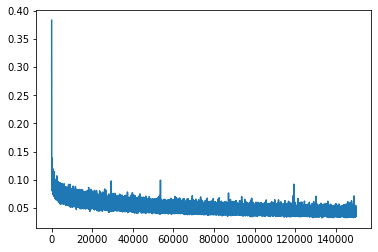

epoch: 81 	 step:0 	 loss: 0.04009
epoch: 81 	 step:100 	 loss: 0.04712
epoch: 81 	 step:200 	 loss: 0.0411
epoch: 81 	 step:300 	 loss: 0.0386
epoch: 81 	 step:400 	 loss: 0.03749
epoch: 81 	 step:500 	 loss: 0.04326
epoch: 81 	 step:600 	 loss: 0.0409
epoch: 81 	 step:700 	 loss: 0.04106
epoch: 81 	 step:800 	 loss: 0.03762
epoch: 81 	 step:900 	 loss: 0.03982
epoch: 81 	 step:1000 	 loss: 0.03677
epoch: 81 	 step:1100 	 loss: 0.04195
epoch: 81 	 step:1200 	 loss: 0.04263
epoch: 81 	 step:1300 	 loss: 0.0409
epoch: 81 	 step:1400 	 loss: 0.04044
epoch: 81 	 step:1500 	 loss: 0.04064
epoch: 81 	 step:1600 	 loss: 0.04116
epoch: 81 	 step:1700 	 loss: 0.03579
epoch: 81 	 step:1800 	 loss: 0.03662


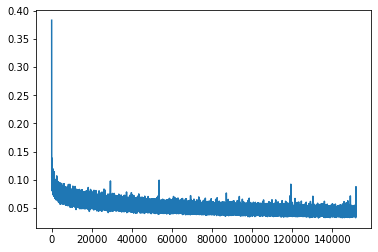

epoch: 82 	 step:0 	 loss: 0.04246
epoch: 82 	 step:100 	 loss: 0.03588
epoch: 82 	 step:200 	 loss: 0.04157
epoch: 82 	 step:300 	 loss: 0.04489
epoch: 82 	 step:400 	 loss: 0.04035
epoch: 82 	 step:500 	 loss: 0.04248
epoch: 82 	 step:600 	 loss: 0.03965
epoch: 82 	 step:700 	 loss: 0.04724
epoch: 82 	 step:800 	 loss: 0.04407
epoch: 82 	 step:900 	 loss: 0.03994
epoch: 82 	 step:1000 	 loss: 0.04397
epoch: 82 	 step:1100 	 loss: 0.03745
epoch: 82 	 step:1200 	 loss: 0.04076
epoch: 82 	 step:1300 	 loss: 0.04189
epoch: 82 	 step:1400 	 loss: 0.04321
epoch: 82 	 step:1500 	 loss: 0.04213
epoch: 82 	 step:1600 	 loss: 0.05018
epoch: 82 	 step:1700 	 loss: 0.03996
epoch: 82 	 step:1800 	 loss: 0.03937


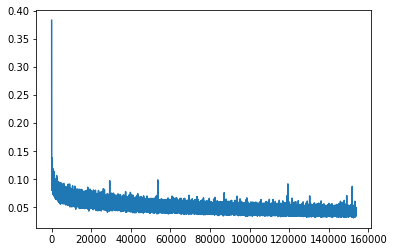

epoch: 83 	 step:0 	 loss: 0.04339
epoch: 83 	 step:100 	 loss: 0.03975
epoch: 83 	 step:200 	 loss: 0.04215
epoch: 83 	 step:300 	 loss: 0.04097
epoch: 83 	 step:400 	 loss: 0.03506
epoch: 83 	 step:500 	 loss: 0.03758
epoch: 83 	 step:600 	 loss: 0.04055
epoch: 83 	 step:700 	 loss: 0.04662
epoch: 83 	 step:800 	 loss: 0.04301
epoch: 83 	 step:900 	 loss: 0.04282
epoch: 83 	 step:1000 	 loss: 0.04323
epoch: 83 	 step:1100 	 loss: 0.04374
epoch: 83 	 step:1200 	 loss: 0.04518
epoch: 83 	 step:1300 	 loss: 0.04607
epoch: 83 	 step:1400 	 loss: 0.03602
epoch: 83 	 step:1500 	 loss: 0.04901
epoch: 83 	 step:1600 	 loss: 0.03718
epoch: 83 	 step:1700 	 loss: 0.04324
epoch: 83 	 step:1800 	 loss: 0.04476


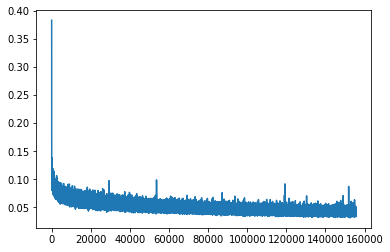

epoch: 84 	 step:0 	 loss: 0.04304
epoch: 84 	 step:100 	 loss: 0.04355
epoch: 84 	 step:200 	 loss: 0.03673
epoch: 84 	 step:300 	 loss: 0.0386
epoch: 84 	 step:400 	 loss: 0.03944
epoch: 84 	 step:500 	 loss: 0.03951
epoch: 84 	 step:600 	 loss: 0.03826
epoch: 84 	 step:700 	 loss: 0.04229
epoch: 84 	 step:800 	 loss: 0.03804
epoch: 84 	 step:900 	 loss: 0.03879
epoch: 84 	 step:1000 	 loss: 0.03401
epoch: 84 	 step:1100 	 loss: 0.04068
epoch: 84 	 step:1200 	 loss: 0.03743
epoch: 84 	 step:1300 	 loss: 0.04057
epoch: 84 	 step:1400 	 loss: 0.0395
epoch: 84 	 step:1500 	 loss: 0.0408
epoch: 84 	 step:1600 	 loss: 0.0394
epoch: 84 	 step:1700 	 loss: 0.03472
epoch: 84 	 step:1800 	 loss: 0.04054


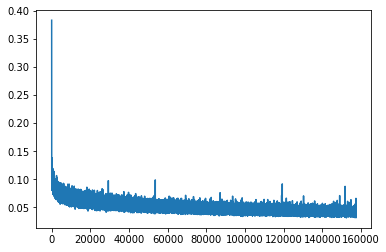

epoch: 85 	 step:0 	 loss: 0.04386
epoch: 85 	 step:100 	 loss: 0.04017
epoch: 85 	 step:200 	 loss: 0.0406
epoch: 85 	 step:300 	 loss: 0.04536
epoch: 85 	 step:400 	 loss: 0.03984
epoch: 85 	 step:500 	 loss: 0.04502
epoch: 85 	 step:600 	 loss: 0.03951
epoch: 85 	 step:700 	 loss: 0.03782
epoch: 85 	 step:800 	 loss: 0.03735
epoch: 85 	 step:900 	 loss: 0.03468
epoch: 85 	 step:1000 	 loss: 0.03832
epoch: 85 	 step:1100 	 loss: 0.04006
epoch: 85 	 step:1200 	 loss: 0.03729
epoch: 85 	 step:1300 	 loss: 0.03813
epoch: 85 	 step:1400 	 loss: 0.03873
epoch: 85 	 step:1500 	 loss: 0.0431
epoch: 85 	 step:1600 	 loss: 0.03675
epoch: 85 	 step:1700 	 loss: 0.04448
epoch: 85 	 step:1800 	 loss: 0.04502


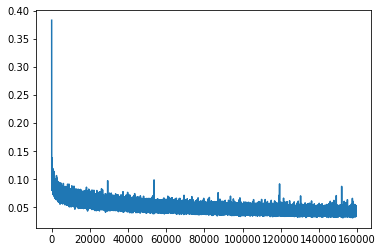

epoch: 86 	 step:0 	 loss: 0.04212
epoch: 86 	 step:100 	 loss: 0.03812
epoch: 86 	 step:200 	 loss: 0.045
epoch: 86 	 step:300 	 loss: 0.03786
epoch: 86 	 step:400 	 loss: 0.04522
epoch: 86 	 step:500 	 loss: 0.04136
epoch: 86 	 step:600 	 loss: 0.03679
epoch: 86 	 step:700 	 loss: 0.0398
epoch: 86 	 step:800 	 loss: 0.04298
epoch: 86 	 step:900 	 loss: 0.0393
epoch: 86 	 step:1000 	 loss: 0.03814
epoch: 86 	 step:1100 	 loss: 0.03806
epoch: 86 	 step:1200 	 loss: 0.03942
epoch: 86 	 step:1300 	 loss: 0.04529
epoch: 86 	 step:1400 	 loss: 0.041
epoch: 86 	 step:1500 	 loss: 0.04014
epoch: 86 	 step:1600 	 loss: 0.03416
epoch: 86 	 step:1700 	 loss: 0.04346
epoch: 86 	 step:1800 	 loss: 0.03687


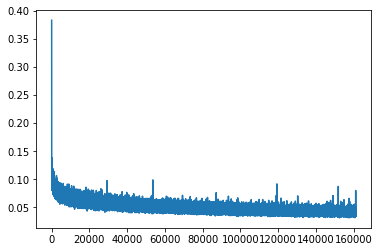

epoch: 87 	 step:0 	 loss: 0.04336
epoch: 87 	 step:100 	 loss: 0.03857
epoch: 87 	 step:200 	 loss: 0.03886
epoch: 87 	 step:300 	 loss: 0.03989
epoch: 87 	 step:400 	 loss: 0.04081
epoch: 87 	 step:500 	 loss: 0.04309
epoch: 87 	 step:600 	 loss: 0.04227
epoch: 87 	 step:700 	 loss: 0.04447
epoch: 87 	 step:800 	 loss: 0.04256
epoch: 87 	 step:900 	 loss: 0.04344
epoch: 87 	 step:1000 	 loss: 0.04144
epoch: 87 	 step:1100 	 loss: 0.04469
epoch: 87 	 step:1200 	 loss: 0.0396
epoch: 87 	 step:1300 	 loss: 0.03474
epoch: 87 	 step:1400 	 loss: 0.0439
epoch: 87 	 step:1500 	 loss: 0.0358
epoch: 87 	 step:1600 	 loss: 0.04347
epoch: 87 	 step:1700 	 loss: 0.04546
epoch: 87 	 step:1800 	 loss: 0.04281


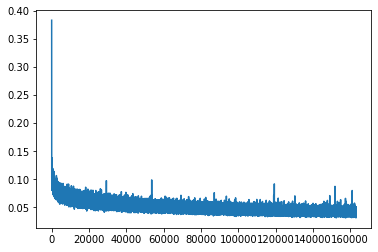

epoch: 88 	 step:0 	 loss: 0.03723
epoch: 88 	 step:100 	 loss: 0.04918
epoch: 88 	 step:200 	 loss: 0.04076
epoch: 88 	 step:300 	 loss: 0.03977
epoch: 88 	 step:400 	 loss: 0.04329
epoch: 88 	 step:500 	 loss: 0.03626
epoch: 88 	 step:600 	 loss: 0.0426
epoch: 88 	 step:700 	 loss: 0.04119
epoch: 88 	 step:800 	 loss: 0.04072
epoch: 88 	 step:900 	 loss: 0.04335
epoch: 88 	 step:1000 	 loss: 0.03763
epoch: 88 	 step:1100 	 loss: 0.04342
epoch: 88 	 step:1200 	 loss: 0.03522
epoch: 88 	 step:1300 	 loss: 0.04341
epoch: 88 	 step:1400 	 loss: 0.04394
epoch: 88 	 step:1500 	 loss: 0.03665
epoch: 88 	 step:1600 	 loss: 0.04836
epoch: 88 	 step:1700 	 loss: 0.04543
epoch: 88 	 step:1800 	 loss: 0.04128


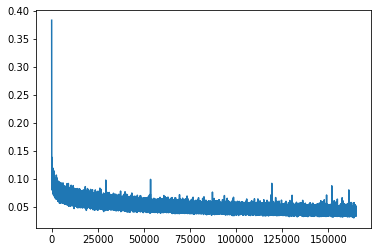

epoch: 89 	 step:0 	 loss: 0.04004
epoch: 89 	 step:100 	 loss: 0.03858
epoch: 89 	 step:200 	 loss: 0.04014
epoch: 89 	 step:300 	 loss: 0.0398
epoch: 89 	 step:400 	 loss: 0.04331
epoch: 89 	 step:500 	 loss: 0.04344
epoch: 89 	 step:600 	 loss: 0.04275
epoch: 89 	 step:700 	 loss: 0.03883
epoch: 89 	 step:800 	 loss: 0.03914
epoch: 89 	 step:900 	 loss: 0.03295
epoch: 89 	 step:1000 	 loss: 0.03561
epoch: 89 	 step:1100 	 loss: 0.03899
epoch: 89 	 step:1200 	 loss: 0.03976
epoch: 89 	 step:1300 	 loss: 0.04199
epoch: 89 	 step:1400 	 loss: 0.03964
epoch: 89 	 step:1500 	 loss: 0.03892
epoch: 89 	 step:1600 	 loss: 0.04288
epoch: 89 	 step:1700 	 loss: 0.04083
epoch: 89 	 step:1800 	 loss: 0.04394


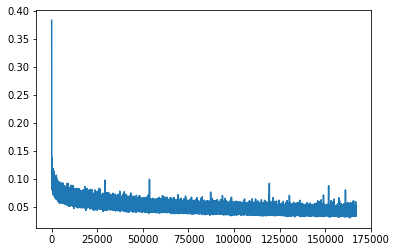

epoch: 90 	 step:0 	 loss: 0.03759
epoch: 90 	 step:100 	 loss: 0.03642
epoch: 90 	 step:200 	 loss: 0.04158
epoch: 90 	 step:300 	 loss: 0.04602
epoch: 90 	 step:400 	 loss: 0.0377
epoch: 90 	 step:500 	 loss: 0.0485
epoch: 90 	 step:600 	 loss: 0.04007
epoch: 90 	 step:700 	 loss: 0.04038
epoch: 90 	 step:800 	 loss: 0.04447
epoch: 90 	 step:900 	 loss: 0.04389
epoch: 90 	 step:1000 	 loss: 0.03917
epoch: 90 	 step:1100 	 loss: 0.04277
epoch: 90 	 step:1200 	 loss: 0.04155
epoch: 90 	 step:1300 	 loss: 0.04369
epoch: 90 	 step:1400 	 loss: 0.04014
epoch: 90 	 step:1500 	 loss: 0.03865
epoch: 90 	 step:1600 	 loss: 0.03875
epoch: 90 	 step:1700 	 loss: 0.04065
epoch: 90 	 step:1800 	 loss: 0.03776


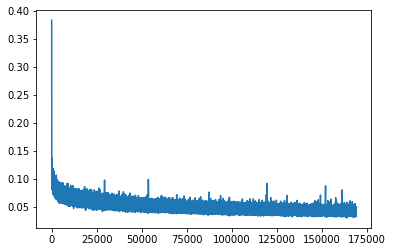

epoch: 91 	 step:0 	 loss: 0.03989
epoch: 91 	 step:100 	 loss: 0.03978
epoch: 91 	 step:200 	 loss: 0.03423
epoch: 91 	 step:300 	 loss: 0.04977
epoch: 91 	 step:400 	 loss: 0.03958
epoch: 91 	 step:500 	 loss: 0.03607
epoch: 91 	 step:600 	 loss: 0.04523
epoch: 91 	 step:700 	 loss: 0.04249
epoch: 91 	 step:800 	 loss: 0.04122
epoch: 91 	 step:900 	 loss: 0.03772
epoch: 91 	 step:1000 	 loss: 0.04102
epoch: 91 	 step:1100 	 loss: 0.03558
epoch: 91 	 step:1200 	 loss: 0.04021
epoch: 91 	 step:1300 	 loss: 0.03939
epoch: 91 	 step:1400 	 loss: 0.04325
epoch: 91 	 step:1500 	 loss: 0.04232
epoch: 91 	 step:1600 	 loss: 0.03935
epoch: 91 	 step:1700 	 loss: 0.04522
epoch: 91 	 step:1800 	 loss: 0.03877


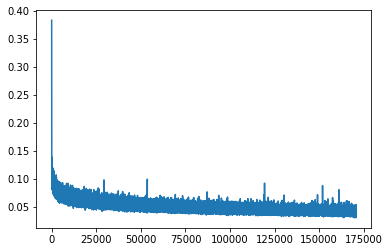

epoch: 92 	 step:0 	 loss: 0.03877
epoch: 92 	 step:100 	 loss: 0.04418
epoch: 92 	 step:200 	 loss: 0.03788
epoch: 92 	 step:300 	 loss: 0.03651
epoch: 92 	 step:400 	 loss: 0.04059
epoch: 92 	 step:500 	 loss: 0.03518
epoch: 92 	 step:600 	 loss: 0.04071
epoch: 92 	 step:700 	 loss: 0.03557
epoch: 92 	 step:800 	 loss: 0.03702
epoch: 92 	 step:900 	 loss: 0.0425
epoch: 92 	 step:1000 	 loss: 0.03949
epoch: 92 	 step:1100 	 loss: 0.04542
epoch: 92 	 step:1200 	 loss: 0.04138
epoch: 92 	 step:1300 	 loss: 0.03864
epoch: 92 	 step:1400 	 loss: 0.04192
epoch: 92 	 step:1500 	 loss: 0.04296
epoch: 92 	 step:1600 	 loss: 0.04923
epoch: 92 	 step:1700 	 loss: 0.03927
epoch: 92 	 step:1800 	 loss: 0.0384


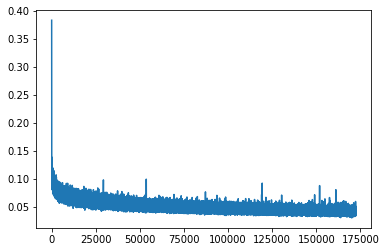

epoch: 93 	 step:0 	 loss: 0.03488
epoch: 93 	 step:100 	 loss: 0.04107
epoch: 93 	 step:200 	 loss: 0.04001
epoch: 93 	 step:300 	 loss: 0.04024
epoch: 93 	 step:400 	 loss: 0.0366
epoch: 93 	 step:500 	 loss: 0.04005
epoch: 93 	 step:600 	 loss: 0.03711
epoch: 93 	 step:700 	 loss: 0.03731
epoch: 93 	 step:800 	 loss: 0.03645
epoch: 93 	 step:900 	 loss: 0.0388
epoch: 93 	 step:1000 	 loss: 0.03524
epoch: 93 	 step:1100 	 loss: 0.04308
epoch: 93 	 step:1200 	 loss: 0.03913
epoch: 93 	 step:1300 	 loss: 0.03748
epoch: 93 	 step:1400 	 loss: 0.0513
epoch: 93 	 step:1500 	 loss: 0.04635
epoch: 93 	 step:1600 	 loss: 0.04458
epoch: 93 	 step:1700 	 loss: 0.03469
epoch: 93 	 step:1800 	 loss: 0.03978


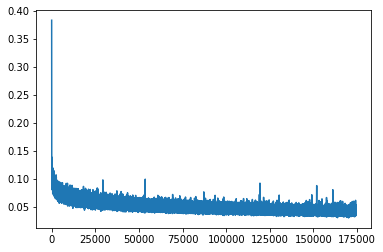

epoch: 94 	 step:0 	 loss: 0.03878
epoch: 94 	 step:100 	 loss: 0.03857
epoch: 94 	 step:200 	 loss: 0.03458
epoch: 94 	 step:300 	 loss: 0.03721
epoch: 94 	 step:400 	 loss: 0.04384
epoch: 94 	 step:500 	 loss: 0.04122
epoch: 94 	 step:600 	 loss: 0.03892
epoch: 94 	 step:700 	 loss: 0.03605
epoch: 94 	 step:800 	 loss: 0.0437
epoch: 94 	 step:900 	 loss: 0.03946
epoch: 94 	 step:1000 	 loss: 0.03822
epoch: 94 	 step:1100 	 loss: 0.04639
epoch: 94 	 step:1200 	 loss: 0.0419
epoch: 94 	 step:1300 	 loss: 0.03599
epoch: 94 	 step:1400 	 loss: 0.03647
epoch: 94 	 step:1500 	 loss: 0.0367
epoch: 94 	 step:1600 	 loss: 0.04008
epoch: 94 	 step:1700 	 loss: 0.0483
epoch: 94 	 step:1800 	 loss: 0.03761


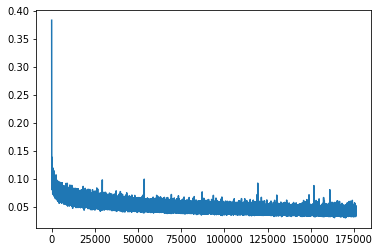

epoch: 95 	 step:0 	 loss: 0.03565
epoch: 95 	 step:100 	 loss: 0.0392
epoch: 95 	 step:200 	 loss: 0.04204
epoch: 95 	 step:300 	 loss: 0.0423
epoch: 95 	 step:400 	 loss: 0.03937
epoch: 95 	 step:500 	 loss: 0.03993
epoch: 95 	 step:600 	 loss: 0.03584
epoch: 95 	 step:700 	 loss: 0.04185
epoch: 95 	 step:800 	 loss: 0.03841
epoch: 95 	 step:900 	 loss: 0.04
epoch: 95 	 step:1000 	 loss: 0.03917
epoch: 95 	 step:1100 	 loss: 0.03925
epoch: 95 	 step:1200 	 loss: 0.03761
epoch: 95 	 step:1300 	 loss: 0.03696
epoch: 95 	 step:1400 	 loss: 0.04332
epoch: 95 	 step:1500 	 loss: 0.04003
epoch: 95 	 step:1600 	 loss: 0.03918
epoch: 95 	 step:1700 	 loss: 0.0389
epoch: 95 	 step:1800 	 loss: 0.03946


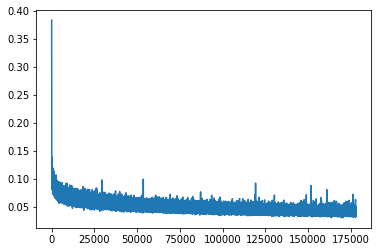

epoch: 96 	 step:0 	 loss: 0.04227
epoch: 96 	 step:100 	 loss: 0.03985
epoch: 96 	 step:200 	 loss: 0.03716
epoch: 96 	 step:300 	 loss: 0.04352
epoch: 96 	 step:400 	 loss: 0.0423
epoch: 96 	 step:500 	 loss: 0.03841
epoch: 96 	 step:600 	 loss: 0.03758
epoch: 96 	 step:700 	 loss: 0.0413
epoch: 96 	 step:800 	 loss: 0.04305
epoch: 96 	 step:900 	 loss: 0.03732
epoch: 96 	 step:1000 	 loss: 0.0397
epoch: 96 	 step:1100 	 loss: 0.03924
epoch: 96 	 step:1200 	 loss: 0.03986
epoch: 96 	 step:1300 	 loss: 0.04095
epoch: 96 	 step:1400 	 loss: 0.03423
epoch: 96 	 step:1500 	 loss: 0.03512
epoch: 96 	 step:1600 	 loss: 0.03456
epoch: 96 	 step:1700 	 loss: 0.03792
epoch: 96 	 step:1800 	 loss: 0.03794


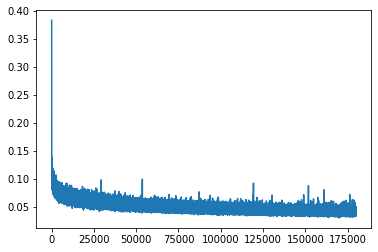

epoch: 97 	 step:0 	 loss: 0.04224
epoch: 97 	 step:100 	 loss: 0.03413
epoch: 97 	 step:200 	 loss: 0.04095
epoch: 97 	 step:300 	 loss: 0.03766
epoch: 97 	 step:400 	 loss: 0.04035
epoch: 97 	 step:500 	 loss: 0.03947
epoch: 97 	 step:600 	 loss: 0.03802
epoch: 97 	 step:700 	 loss: 0.04017
epoch: 97 	 step:800 	 loss: 0.03646
epoch: 97 	 step:900 	 loss: 0.03453
epoch: 97 	 step:1000 	 loss: 0.04638
epoch: 97 	 step:1100 	 loss: 0.03609
epoch: 97 	 step:1200 	 loss: 0.03384
epoch: 97 	 step:1300 	 loss: 0.0378
epoch: 97 	 step:1400 	 loss: 0.04058
epoch: 97 	 step:1500 	 loss: 0.04243
epoch: 97 	 step:1600 	 loss: 0.04042
epoch: 97 	 step:1700 	 loss: 0.04434
epoch: 97 	 step:1800 	 loss: 0.0402


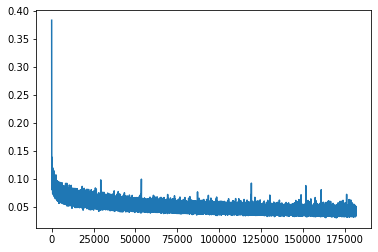

epoch: 98 	 step:0 	 loss: 0.03738
epoch: 98 	 step:100 	 loss: 0.03952
epoch: 98 	 step:200 	 loss: 0.03652
epoch: 98 	 step:300 	 loss: 0.04229
epoch: 98 	 step:400 	 loss: 0.04449
epoch: 98 	 step:500 	 loss: 0.03634
epoch: 98 	 step:600 	 loss: 0.04549
epoch: 98 	 step:700 	 loss: 0.0406
epoch: 98 	 step:800 	 loss: 0.03773
epoch: 98 	 step:900 	 loss: 0.0341
epoch: 98 	 step:1000 	 loss: 0.03982
epoch: 98 	 step:1100 	 loss: 0.04582
epoch: 98 	 step:1200 	 loss: 0.03908
epoch: 98 	 step:1300 	 loss: 0.04085
epoch: 98 	 step:1400 	 loss: 0.0481
epoch: 98 	 step:1500 	 loss: 0.0409
epoch: 98 	 step:1600 	 loss: 0.04119
epoch: 98 	 step:1700 	 loss: 0.04555
epoch: 98 	 step:1800 	 loss: 0.03989


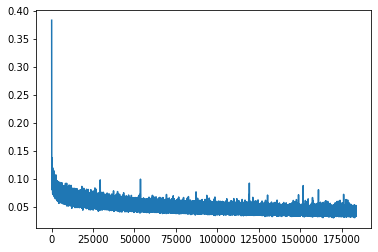

epoch: 99 	 step:0 	 loss: 0.03714
epoch: 99 	 step:100 	 loss: 0.04036
epoch: 99 	 step:200 	 loss: 0.0397
epoch: 99 	 step:300 	 loss: 0.04175
epoch: 99 	 step:400 	 loss: 0.03497
epoch: 99 	 step:500 	 loss: 0.03949
epoch: 99 	 step:600 	 loss: 0.04575
epoch: 99 	 step:700 	 loss: 0.04102
epoch: 99 	 step:800 	 loss: 0.03449
epoch: 99 	 step:900 	 loss: 0.03901
epoch: 99 	 step:1000 	 loss: 0.0452
epoch: 99 	 step:1100 	 loss: 0.03611
epoch: 99 	 step:1200 	 loss: 0.04161
epoch: 99 	 step:1300 	 loss: 0.04292
epoch: 99 	 step:1400 	 loss: 0.03857
epoch: 99 	 step:1500 	 loss: 0.03985
epoch: 99 	 step:1600 	 loss: 0.04319
epoch: 99 	 step:1700 	 loss: 0.04319
epoch: 99 	 step:1800 	 loss: 0.04153


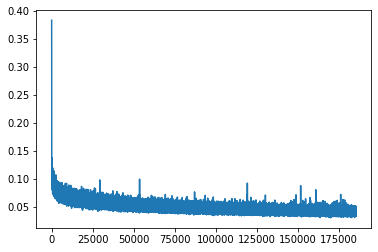

epoch: 100 	 step:0 	 loss: 0.03978
epoch: 100 	 step:100 	 loss: 0.03904
epoch: 100 	 step:200 	 loss: 0.04055
epoch: 100 	 step:300 	 loss: 0.04025
epoch: 100 	 step:400 	 loss: 0.03957
epoch: 100 	 step:500 	 loss: 0.04016
epoch: 100 	 step:600 	 loss: 0.0387
epoch: 100 	 step:700 	 loss: 0.03835
epoch: 100 	 step:800 	 loss: 0.04188
epoch: 100 	 step:900 	 loss: 0.04555
epoch: 100 	 step:1000 	 loss: 0.03905
epoch: 100 	 step:1100 	 loss: 0.03873
epoch: 100 	 step:1200 	 loss: 0.04172
epoch: 100 	 step:1300 	 loss: 0.04185
epoch: 100 	 step:1400 	 loss: 0.04094
epoch: 100 	 step:1500 	 loss: 0.04285
epoch: 100 	 step:1600 	 loss: 0.04129
epoch: 100 	 step:1700 	 loss: 0.03887
epoch: 100 	 step:1800 	 loss: 0.0402


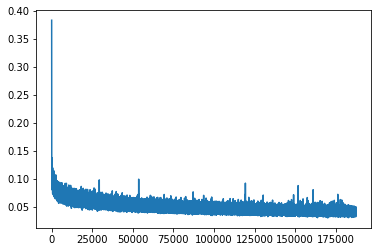

In [11]:
### TRAIN MODEL ###

num_epochs = 100

history = train_model(gen, opt, device, dataloader['train'], epochs=num_epochs)

In [12]:
def test_generator(model, device, testloader, one_batch=False):
    # put model to eval mode
    model = model.to(device=device)
    model.eval()

    # move test images to device and reduce to magnitude information in fourier space
    test_images = []
    outputs = []
    
    for data in testloader:
        data = data.to(device=device)
        test_images.append(data.cpu().numpy())
        magn = calc_mags(data)
        out = model(magn)
        
        outputs.append(out.cpu().detach().numpy())
        if one_batch: break
    
    return np.concatenate(test_images), np.concatenate(outputs)

In [13]:
# Calculate test predictions #

test_original, test_predicted = test_generator(gen, device, dataloader['test'])
print(test_original.shape)
print(test_predicted.shape)

(8000, 1, 28, 28)
(8000, 1, 28, 28)


In [14]:
### CACHE RESULTS ###

import pickle
pickle.dump(test_original, open("../cache/e2e/Fashion-sgnl1-{}e_original.p".format(num_epochs), "wb"))
pickle.dump(test_predicted, open("../cache/e2e/Fashion-sgnl1-{}e.p".format(num_epochs), "wb"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


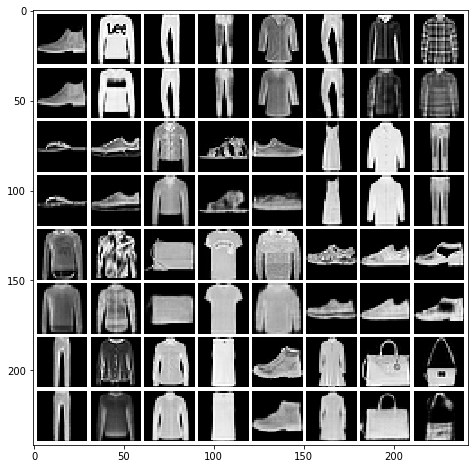

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Registered:


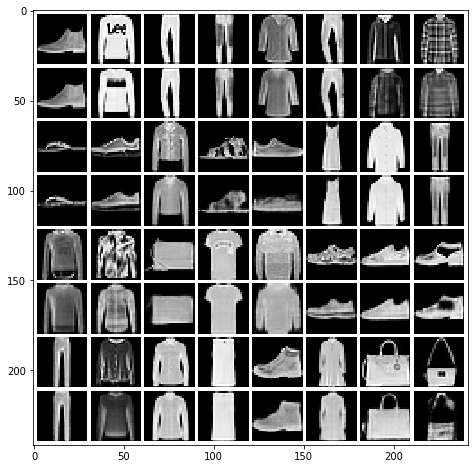

In [14]:
# Print predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    test_predicted[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/Fashion/end-to-end/phase-prediction/e2e-l1.png")

print("Registered:")
results_reg = register_croco(test_predicted[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/Fashion/end-to-end/phase-prediction/e2e-l1-reg.png")

In [15]:
# Benchmark test predictions #

benchmark(pred=test_predicted[:1024], true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.015247181689289846, std: 0.014696992758818174
  MAE: 0.05605573238517536, std: 0.030555258374341893
  SSIM: 0.7755169726064503, std: 0.15832882567462636
  Sharpness: 0.10052772877016015, std: 0.047107527408252546
  PhCo-MSE: 0.014311394724643378, std: 0.01454672656294299
  PhCo-MAE: 0.05506113895262388, std: 0.03225688340099301
  PhCo-SSIM: 0.7823510306223526, std: 0.1650591843827848
  CroCo-MSE: 0.012747443632122213, std: 0.01094426472665541
  CroCo-MAE: 0.05240154094190075, std: 0.026854390667081684
  CroCo-SSIM: 0.7944721224374022, std: 0.1427564444585079

Magnitude error:
  MSE Magnitude: 3.6072165064623674, std: 3.2368514793082106

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]

Markdown table values:
 0.01525 | 0.05606 | 0.7755 | 0.1005 | 0.01431 | 0.05506 | 0.7824 | 0.01275 | 0.05240 | 0.7945 | 3.607 |


## Evaluation for direct signal prediction  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.01494 | 0.05960 | 0.7660 | 0.1051 | 0.01518 | 0.06016 | 0.7678 | 0.01282 | 0.05637 | 0.7833 | 3.699 |
| 1 | L1 | 2048 | 100 | 0.01525 | 0.05606 | 0.7755 | 0.1005 | 0.01431 | 0.05506 | 0.7824 | 0.01275 | 0.05240 | 0.7945 | 3.607 |

  
---

Signal error:
  MSE: 0.014943513144999088, std: 0.013879839829935804
  MAE: 0.059602654162517865, std: 0.031047403899229734
  SSIM: 0.7660231889917894, std: 0.15769069877303798
  Sharpness: 0.1051292372756038, std: 0.047872499185100864
  PhCo-MSE: 0.015176164033618988, std: 0.0192260862675426
  PhCo-MAE: 0.060159644550367375, std: 0.03796967297754156
  PhCo-SSIM: 0.7677636994034744, std: 0.1709521311479364
  CroCo-MSE: 0.01282069852186396, std: 0.010781173708729892
  CroCo-MAE: 0.05637230021056894, std: 0.027926230628787824
  CroCo-SSIM: 0.7833322600182305, std: 0.14357247294661626

Magnitude error:
  MSE Magnitude: 3.699480559167641, std: 3.097867001070402

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]
  
---

Signal error:
  MSE: 0.015247181689289846, std: 0.014696992758818174
  MAE: 0.05605573238517536, std: 0.030555258374341893
  SSIM: 0.7755169726064503, std: 0.15832882567462636
  Sharpness: 0.10052772877016015, std: 0.047107527408252546
  PhCo-MSE: 0.014311394724643378, std: 0.01454672656294299
  PhCo-MAE: 0.05506113895262388, std: 0.03225688340099301
  PhCo-SSIM: 0.7823510306223526, std: 0.1650591843827848
  CroCo-MSE: 0.012747443632122213, std: 0.01094426472665541
  CroCo-MAE: 0.05240154094190075, std: 0.026854390667081684
  CroCo-SSIM: 0.7944721224374022, std: 0.1427564444585079

Magnitude error:
  MSE Magnitude: 3.6072165064623674, std: 3.2368514793082106

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [0.00, 1.00] - should be in [0, 1]

In [16]:
### Exchange original phase with FC Net computed phase ###

orig_fft = np.fft.fft2(test_original[:1024])
orig_magn = np.abs(orig_fft)
orig_phase = np.angle(orig_fft)
test_fft = np.fft.fft2(test_predicted[:1024])
test_magn = np.abs(test_fft)
test_Phase = np.angle(test_fft)

Combined = orig_magn * np.exp(1j * test_Phase)
combined = np.real(np.fft.ifft2(Combined)).astype(np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


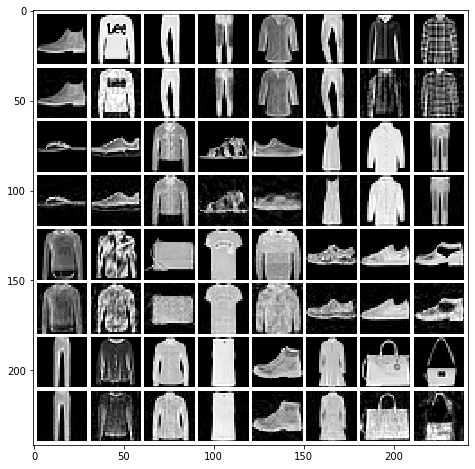

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Registered:


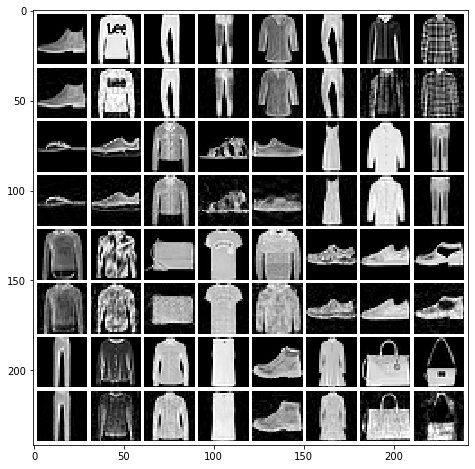

In [17]:
# Print original phase predictions #
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    combined[:32, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)
plot_grid(to_plot, figsize=(8,8), file="../out/Fashion/end-to-end/phase-prediction/e2e-magn-l1.png")

print("Registered:")
results_reg = register_croco(combined[:32], test_original[:32])
to_plot = np.stack([test_original[:32, 0].reshape(4, 8, 28, 28), 
                    results_reg[:, 0].reshape(4, 8, 28, 28)], axis=1).reshape(-1, 1, 28, 28)        
plot_grid(to_plot, figsize=(8,8), file="../out/Fashion/end-to-end/phase-prediction/e2e-magn-l1-reg.png")

In [18]:
# Benchmark predicted phase with original magnitude #

benchmark(pred=combined, true=test_original[:1024], check_all=True)

Signal error:
  MSE: 0.016867003208346887, std: 0.018365656618231203
  MAE: 0.07516290090461553, std: 0.04089259117541991
  SSIM: 0.7412498916573058, std: 0.17827774675480373
  Sharpness: 0.13791870929644423, std: 0.0675003303403233
  PhCo-MSE: 0.015497630456650313, std: 0.01795545193236627
  PhCo-MAE: 0.07340202542945917, std: 0.04174191453061383
  PhCo-SSIM: 0.7525284760829678, std: 0.1787042167957142
  CroCo-MSE: 0.01357761833838822, std: 0.013288682881994572
  CroCo-MAE: 0.07046672293472511, std: 0.0360916859819295
  CroCo-SSIM: 0.7655729560177386, std: 0.15477698180022129

Magnitude error:
  MSE Magnitude: 4.386165526236142e-14, std: 2.1836622404835178e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.71, 1.47] - should be in [0, 1]

Markdown table values:
 0.01687 | 0.07516 | 0.7412 | 0.1379 | 0.01550 | 0.07340 | 0.7525 | 0.01358 | 0.07047 | 0.7656 | 0.00000000000004386 |


## Evaluation for signal prediction with original magnitude  (1024 samples)

#### Simple L2 squared loss

| Nr | Loss | Size | epochs| MSE | MAE | SSIM | SHRP | PhaCo-MSE | PhaCo-MAE | PhaCo-SSIM | CroCo-MSE | CroCo-MAE | CroCo-SSIM | MSE Magn
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | L2 | 2048 | 100 | 0.01694 | 0.07691 | 0.7342 | 0.1423 | 0.01689 | 0.07679 | 0.7394 | 0.01403 | 0.07275 | 0.7562 | 0.00000000000004375 |
| 1 | L1 | 2048 | 100 | 0.01687 | 0.07516 | 0.7412 | 0.1379 | 0.01550 | 0.07340 | 0.7525 | 0.01358 | 0.07047 | 0.7656 | 0.00000000000004386 |

---

Signal error:
  MSE: 0.016935493462824525, std: 0.017956612217324114
  MAE: 0.07690986885972961, std: 0.04088112440695923
  SSIM: 0.7342292753719264, std: 0.1766781907234573
  Sharpness: 0.14229773349285663, std: 0.06796666167853352
  PhCo-MSE: 0.016889193016936588, std: 0.023600258601723156
  PhCo-MAE: 0.07678670961104217, std: 0.04648338919993774
  PhCo-SSIM: 0.7393931087797245, std: 0.1848686337562756
  CroCo-MSE: 0.014027487405087413, std: 0.01366778321921545
  CroCo-MAE: 0.072752503958327, std: 0.03679470513522475
  CroCo-SSIM: 0.7562014946271016, std: 0.15472231314532714

Magnitude error:
  MSE Magnitude: 4.3746956485749794e-14, std: 2.2160456284056736e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.75, 1.43] - should be in [0, 1]

---

Signal error:
  MSE: 0.016867003208346887, std: 0.018365656618231203
  MAE: 0.07516290090461553, std: 0.04089259117541991
  SSIM: 0.7412498916573058, std: 0.17827774675480373
  Sharpness: 0.13791870929644423, std: 0.0675003303403233
  PhCo-MSE: 0.015497630456650313, std: 0.01795545193236627
  PhCo-MAE: 0.07340202542945917, std: 0.04174191453061383
  PhCo-SSIM: 0.7525284760829678, std: 0.1787042167957142
  CroCo-MSE: 0.01357761833838822, std: 0.013288682881994572
  CroCo-MAE: 0.07046672293472511, std: 0.0360916859819295
  CroCo-SSIM: 0.7655729560177386, std: 0.15477698180022129

Magnitude error:
  MSE Magnitude: 4.386165526236142e-14, std: 2.1836622404835178e-14

Image constraints:
  Imag part = 0.0 - should be very close to 0
  Real part is in [-0.71, 1.47] - should be in [0, 1]